In [1]:
import seaborn as sns

import pickle
import numpy as np
import pandas as pd

# Personal python functions
import sys
sys.path.insert(1, 'C:\\Users\\jamilah\\Documents\\Github_analysis_PROJECTS\\Motor_classification')
from subfunctions.make_a_properlist import *
from subfunctions.two_sample_stats import *
from subfunctions.findall import *

# Read the classification results from pickle

In [3]:
file_path = 'C:\\Users\\jamilah\\Documents\\Github_analysis_PROJECTS\\Motor_classification\\e_classification\\classification_results_morecorrect\\'

exp_list = ['rot', 'trans']
ax_val_list = ['all', 'ax0', 'ax1', 'ax2']

# SVM could not be run smoothly like the others: it took 2 weeks to run several samples
# The following were not run because it took too long :
missing_files = ['res_exp_rot_ax0_all_ynum2_NuSVC_fea3', 'res_exp_rot_ax0_all_ynum2_NuSVC_fea2', 'res_exp_rot_ax0_all_ynum2_NuSVC_fea1', 'res_exp_rot_ax0_all_ynum2_NuSVC_fea0', 'res_exp_rot_ax0_all_ynum1_NuSVC_fea3', 'res_exp_rot_ax0_all_ynum1_NuSVC_fea2', 'res_exp_rot_ax0_all_ynum1_NuSVC_fea1', 'res_exp_rot_ax0_all_ynum1_NuSVC_fea0', 'res_exp_rot_ax0_all_ynum0_NuSVC_fea2', 'res_exp_rot_ax0_all_ynum0_NuSVC_fea3', 'res_exp_rot_ax0_all_ynum0_NuSVC_fea0', 'res_exp_rot_ax0_all_ynum0_NuSVC_fea1', 'res_exp_rot_all_all_ynum0_NuSVC_fea0', 'res_exp_rot_all_all_ynum0_NuSVC_fea1', 'res_exp_rot_all_all_ynum0_NuSVC_fea2', 'res_exp_rot_all_all_ynum0_NuSVC_fea3', 'res_exp_rot_all_all_ynum1_NuSVC_fea1', 'res_exp_rot_all_all_ynum1_NuSVC_fea2', 'res_exp_rot_all_all_ynum1_NuSVC_fea3', 'res_exp_rot_all_all_ynum2_NuSVC_fea0', 'res_exp_rot_all_all_ynum2_NuSVC_fea1', 'res_exp_rot_all_all_ynum2_NuSVC_fea2', 'res_exp_rot_all_all_ynum2_NuSVC_fea3', 'res_exp_rot_all_sup_ynum0_NuSVC_fea2', 'res_exp_rot_all_sup_ynum0_NuSVC_fea3', 'res_exp_rot_all_sup_ynum1_NuSVC_fea0', 'res_exp_rot_all_sup_ynum1_NuSVC_fea1', 'res_exp_rot_all_sup_ynum1_NuSVC_fea2', 'res_exp_rot_all_sup_ynum1_NuSVC_fea3', 'res_exp_rot_all_sup_ynum2_NuSVC_fea0', 'res_exp_rot_all_sup_ynum2_NuSVC_fea1', 'res_exp_rot_all_sup_ynum2_NuSVC_fea2', 'res_exp_rot_all_sup_ynum2_NuSVC_fea3', 'res_exp_rot_ax1_all_ynum1_NuSVC_fea3', 'res_exp_rot_ax1_all_ynum2_NuSVC_fea0', 'res_exp_rot_ax1_all_ynum2_NuSVC_fea1', 'res_exp_rot_ax1_all_ynum2_NuSVC_fea2', 'res_exp_rot_ax1_all_ynum2_NuSVC_fea3', 'res_exp_rot_ax2_all_ynum2_NuSVC_fea0', 'res_exp_rot_ax2_all_ynum2_NuSVC_fea1', 'res_exp_rot_ax2_all_ynum2_NuSVC_fea2', 'res_exp_rot_ax2_all_ynum2_NuSVC_fea3', 'res_exp_trans_all_all_ynum2_NuSVC_fea3', 'res_exp_trans_all_sub_ynum2_NuSVC_fea2', 'res_exp_trans_all_sub_ynum2_NuSVC_fea3', 'res_exp_trans_all_sup_ynum1_NuSVC_fea3', 'res_exp_trans_all_sup_ynum2_NuSVC_fea0', 'res_exp_trans_all_sup_ynum2_NuSVC_fea1', 'res_exp_trans_all_sup_ynum2_NuSVC_fea2', 'res_exp_trans_all_sup_ynum2_NuSVC_fea3', 'res_exp_trans_ax0_all_ynum0_NuSVC_fea3', 'res_exp_trans_ax0_all_ynum1_NuSVC_fea0', 'res_exp_trans_ax0_all_ynum1_NuSVC_fea1', 'res_exp_trans_ax0_all_ynum1_NuSVC_fea2', 'res_exp_trans_ax0_all_ynum1_NuSVC_fea3', 'res_exp_trans_ax0_all_ynum2_NuSVC_fea0', 'res_exp_trans_ax0_all_ynum2_NuSVC_fea1', 'res_exp_trans_ax0_all_ynum2_NuSVC_fea2', 'res_exp_trans_ax0_all_ynum2_NuSVC_fea3']

# ------------------------------------

yname = ['lenient', 'strict', 'complex']
m_name_list = ['SGD', 'LDA', 'RF', 'GBC', 'DT', 'MLP', 'GNB', 'NuSVC']
fea_list = ['all', 'top3', 'top2', 'top1']  # fea = 0 (all), fea = 1 (top3), fea = 2 (top2), fea = 3 (top1)

col1 = []
col2 = []
col3 = []
col4 = []
col5 = []
col6 = []

acc_train = []
prec_train = []
recall_train = []
roc_auc_train = []

acc_test = []
prec_test = []
recall_test = []
roc_auc_test = []

acc_cv_test = []
prec_cv_test = []
recall_cv_test = []
roc_auc_cv_test = []

ord_pr = []

plot_label = []

c = 0
for exp in exp_list:
    for ax_val in ax_val_list:
        
        if ax_val == 'all':
            ss_val_list = ['all', 'sub', 'sup']
        else:
            ss_val_list = ['all']
            
        for ss_val in ss_val_list:
            for ynum in range(len(yname)):
                for m_name in m_name_list:
                    for fea in range(len(fea_list)):

                        col1.append(exp)
                        col2.append(ax_val)
                        col3.append(ss_val)

                        col4.append(fea_list[fea])

                        col5.append(m_name)

                        col6.append(yname[ynum])
                        
                        file_name = "res_exp_%s_%s_%s_ynum%d_%s_fea%d" % (exp, ax_val, ss_val, ynum, m_name, fea)
                        
                        plot_label.append('%s_%s_%s_%s' % (exp, ax_val, ss_val, yname[ynum]))
                        
                        out = [1 for i in missing_files if i == file_name]
                        
                        if m_name == 'NuSVC' and any(out) == True:
                            # make nan
                            acc_train.append(np.nan)
                            prec_train.append(np.nan)
                            recall_train.append(np.nan)
                            roc_auc_train.append(np.nan)

                            acc_test.append(np.nan)
                            prec_test.append(np.nan)
                            recall_test.append(np.nan)
                            roc_auc_test.append(np.nan)

                            acc_cv_test.append(np.nan)
                            prec_cv_test.append(np.nan)
                            recall_cv_test.append(np.nan)
                            roc_auc_cv_test.append(np.nan)
                            ord_pr.append(np.nan)
                        elif m_name == 'NuSVC' and 'res_exp_rot_all_all_ynum1_NuSVC_fea0' == file_name:
                            acc_train.append(np.nan)
                            prec_train.append(np.nan)
                            recall_train.append(np.nan)
                            roc_auc_train.append(np.nan)

                            acc_test.append(np.nan)
                            prec_test.append(np.nan)
                            recall_test.append(np.nan)
                            roc_auc_test.append(np.nan)

                            acc_cv_test.append([0.47094123, 0.46344009, 0.4718218, 0.46291827, 0.4742026])
                            prec_cv_test.append([0.45847522, 0.45502517, 0.46469173, 0.45297858, 0.46766417])
                            recall_cv_test.append(np.nan)
                            roc_auc_cv_test.append(np.nan)
                            ord_pr.append(np.nan)
                        else:
                            full_path = file_path + file_name + '.pkl'
                            open_file = open(full_path, "rb")
                            dataout = pickle.load(open_file)
                            open_file.close()
                            
                            dataout = np.ravel(dataout[fea])
                            #print('dataout : ', dataout)

                            # In data, want 
                            acc_train.append(dataout[4])
                            prec_train.append(dataout[5])
                            recall_train.append(dataout[6])
                            roc_auc_train.append(dataout[7])

                            acc_test.append(dataout[8])
                            prec_test.append(dataout[9])
                            recall_test.append(dataout[10])
                            roc_auc_test.append(dataout[11])

                            acc_cv_test.append(dataout[12])
                            prec_cv_test.append(dataout[13])
                            recall_cv_test.append(dataout[14])
                            roc_auc_cv_test.append(dataout[15])

                            if fea == 0: 
                                # Ordered list of important features
                                if len(dataout[16]) == 6:
                                    ord_pr.append([dataout[16][0][0], dataout[16][1][0], dataout[16][2][0], dataout[16][3][0], dataout[16][4][0], dataout[16][5][0]])
                                elif len(dataout[16]) == 5:
                                    ord_pr.append([dataout[16][0][0], dataout[16][1][0], dataout[16][2][0], dataout[16][3][0], dataout[16][4][0]])
                                elif len(dataout[16]) == 4:
                                    ord_pr.append([dataout[16][0][0], dataout[16][1][0], dataout[16][2][0], dataout[16][3][0]])
                                elif len(dataout[16]) == 3:
                                    ord_pr.append([dataout[16][0][0], dataout[16][1][0], dataout[16][2][0]])
                                elif len(dataout[16]) == 2:
                                    ord_pr.append([dataout[16][0][0], dataout[16][1][0]])
                                elif len(dataout[16]) == 1:
                                    ord_pr.append(dataout[16][0][0])
                                else:
                                    ord_pr.append(np.nan)
                            else:
                                ord_pr.append(ord_pr[c-1])

                            c = c + 1

C:\Users\jamilah\AppData\Roaming\Python\Python39\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


# Organize results into a DataFrame

In [4]:
data = col1, col2, col3, col4, col5, col6, acc_train, prec_train, recall_train , roc_auc_train, acc_test, prec_test, recall_test, roc_auc_test, acc_cv_test, prec_cv_test, recall_cv_test, roc_auc_cv_test, ord_pr, plot_label
data = np.transpose(data)
print('shape of data : ', data.shape)

columns = ['exp', 'ax', 'ss', 'fea', 'Models', 'y', 'acc_train', 'prec_train', 'recall_train', 'roc_auc_train', 'acc_test', 'prec_test', 'recall_test', 'roc_auc_test', 'acc_cv_test', 'prec_cv_test', 'recall_cv_test', 'roc_auc_cv_test', 'ord_pr', 'plot_label']


df2plot = pd.DataFrame(data=data, columns=columns)
df2plot

shape of data :  (1152, 20)


C:\Users\jamilah\AppData\Roaming\Python\Python39\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


,exp,ax,ss,fea,Models,y,acc_train,prec_train,recall_train,roc_auc_train,acc_test,prec_test,recall_test,roc_auc_test,acc_cv_test,prec_cv_test,recall_cv_test,roc_auc_cv_test,ord_pr,plot_label
0,rot,all,all,all,SGD,lenient,0.607605,0.607605,0.607605,0.45609,0.605826,0.605826,0.605826,0.459341,"[0.5900557348195952, 0.5968759166911117, 0.591...","[0.659016393442623, 0.6752590346221885, 0.6567...","[0.40017615971814446, 0.3895493908703948, 0.40...","[0.5743860052496835, 0.5957254388121235, 0.572...","[freq_t, joy1derv, joy, freq_fres, fres, joy2d...",rot_all_all_lenient
1,rot,all,all,top3,SGD,lenient,0.606554,0.606554,0.606554,0.461962,0.60477,0.60477,0.60477,0.465646,"[0.576342035787621, 0.5910090935758286, 0.5908...","[0.6565809379727685, 0.6854341736694678, 0.681...","[0.341015854374633, 0.3532951709966241, 0.3714...","[0.5655195920033539, 0.5745716923180051, 0.561...","[freq_t, joy1derv, joy, freq_fres, fres, joy2d...",rot_all_all_lenient
2,rot,all,all,top2,SGD,lenient,0.59106,0.59106,0.59106,0.383667,0.589398,0.589398,0.589398,0.388644,"[0.555294807861543, 0.5731152830742153, 0.5765...","[0.6907467532467533, 0.7059270516717325, 0.688...","[0.23267762771579564, 0.25392631733450755, 0.2...","[0.5361965540433096, 0.5528283160158485, 0.554...","[freq_t, joy1derv, joy, freq_fres, fres, joy2d...",rot_all_all_lenient
3,rot,all,all,top1,SGD,lenient,0.590791,0.590791,0.590791,0.377593,0.590322,0.590322,0.590322,0.382309,"[0.5528014080375476, 0.5670284540921091, 0.555...","[0.6958882854926299, 0.6945193171608266, 0.678...","[0.21197886083382267, 0.22691912520182006, 0.2...","[0.48933038483222835, 0.501435266385041, 0.494...","[freq_t, joy1derv, joy, freq_fres, fres, joy2d...",rot_all_all_lenient
4,rot,all,all,all,LDA,lenient,0.599718,0.599718,0.599718,0.422818,0.597861,0.597861,0.597861,0.426295,"[0.5850689351716046, 0.6003960105602816, 0.592...","[0.6208123953098827, 0.6489082969432315, 0.632...","[0.4352613035819143, 0.4362248642301482, 0.441...","[0.5896904615949097, 0.6062228672461256, 0.592...","[freq_t, joy, joy1derv, joy2derv, freq_fres, f...",rot_all_all_lenient
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1147,trans,ax2,all,top1,GNB,complex,0.419082,0.419082,0.419082,0.616578,0.420175,0.420175,0.420175,0.614116,"[0.41954397394136805, 0.4201954397394137, 0.42...","[nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan]","[freq_fres, freq_t, fres, joy2derv, joy, joy1d...",trans_ax2_all_complex
1148,trans,ax2,all,all,NuSVC,complex,0.385314,0.385314,0.385314,0.561772,0.378359,0.378359,0.378359,0.558088,"[0.3915715539947322, 0.35118525021949076, 0.31...","[nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan]","[joy1derv, freq_t, joy2derv, fres, joy, freq_f...",trans_ax2_all_complex
1149,trans,ax2,all,top3,NuSVC,complex,0.37044,0.37044,0.37044,0.561652,0.36378,0.36378,0.36378,0.55867,"[0.38981562774363476, 0.4170324846356453, 0.33...","[nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan]","[freq_t, joy, joy2derv, fres, freq_fres, joy1d...",trans_ax2_all_complex
1150,trans,ax2,all,top2,NuSVC,complex,0.38303,0.38303,0.38303,0.559754,0.378886,0.378886,0.378886,0.553271,"[0.35645302897278314, 0.33274802458296754, 0.3...","[nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan]","[nan, nan, nan, nan, nan]","[freq_fres, freq_t, joy1derv, joy, joy2derv, f...",trans_ax2_all_complex


In [5]:
# Make a Cross validation measures into a scalar value

output0 = df2plot.acc_cv_test.to_numpy()
output1 = df2plot.prec_cv_test.to_numpy()
output2 = df2plot.recall_cv_test.to_numpy()
output3 = df2plot.roc_auc_cv_test.to_numpy()
acc_cv_test_sca = []
prec_cv_test_sca = []
recall_cv_test_sca = []
roc_cv_test_sca = []
for i in range(len(output0)):
    acc_cv_test_sca.append(np.mean(output0[i]))
    prec_cv_test_sca.append(np.mean(output1[i]))
    recall_cv_test_sca.append(np.mean(output2[i]))
    roc_cv_test_sca.append(np.mean(output3[i]))

    
# Make a column for each 1st, 2nd, and 3rd feature
ord = df2plot.ord_pr.to_numpy()

per_order_1 = []
per_order_2 = []
per_order_3 = []
for i in range(len(ord)):
    if type(ord[i]) == float:
        per_order_1.append(np.nan)
        per_order_2.append(np.nan)
        per_order_3.append(np.nan)
    else:
        per_order_1.append(ord[i][0])
        per_order_2.append(ord[i][1])
        per_order_3.append(ord[i][2])
    

    
    
v0 = pd.Series(acc_cv_test_sca)
v1 = pd.Series(prec_cv_test_sca)
v2 = pd.Series(recall_cv_test_sca)
v3 = pd.Series(roc_cv_test_sca)
v4 = pd.Series(per_order_1)
v5 = pd.Series(per_order_2)
v6 = pd.Series(per_order_3)
df2plot = pd.concat([df2plot, v0, v1, v2, v3, v4, v5, v6], axis=1)

columns = ['exp', 'ax', 'ss', 'fea', 'Models', 'y', 'acc_train', 'prec_train', 'recall_train', 'roc_auc_train', 'acc_test', 'prec_test', 'recall_test', 'roc_auc_test', 'acc_cv_test', 'prec_cv_test', 'recall_cv_test', 'roc_auc_cv_test', 'ord_pr', 'plot_label', 'acc_cv_test_sca', 'prec_cv_test_sca', 'recall_cv_test_sca', 'roc_cv_test_sca', 'per_order_1', 'per_order_2', 'per_order_3']

# rename the columns
df2plot.columns = columns
df2plot

,exp,ax,ss,fea,Models,y,acc_train,prec_train,recall_train,roc_auc_train,...,roc_auc_cv_test,ord_pr,plot_label,acc_cv_test_sca,prec_cv_test_sca,recall_cv_test_sca,roc_cv_test_sca,per_order_1,per_order_2,per_order_3
0,rot,all,all,all,SGD,lenient,0.607605,0.607605,0.607605,0.45609,...,"[0.5743860052496835, 0.5957254388121235, 0.572...","[freq_t, joy1derv, joy, freq_fres, fres, joy2d...",rot_all_all_lenient,0.593623,0.668345,0.385414,0.582166,freq_t,joy1derv,joy
1,rot,all,all,top3,SGD,lenient,0.606554,0.606554,0.606554,0.461962,...,"[0.5655195920033539, 0.5745716923180051, 0.561...","[freq_t, joy1derv, joy, freq_fres, fres, joy2d...",rot_all_all_lenient,0.589486,0.678989,0.352915,0.567463,freq_t,joy1derv,joy
2,rot,all,all,top2,SGD,lenient,0.59106,0.59106,0.59106,0.383667,...,"[0.5361965540433096, 0.5528283160158485, 0.554...","[freq_t, joy1derv, joy, freq_fres, fres, joy2d...",rot_all_all_lenient,0.570052,0.697883,0.249721,0.550646,freq_t,joy1derv,joy
3,rot,all,all,top1,SGD,lenient,0.590791,0.590791,0.590791,0.377593,...,"[0.48933038483222835, 0.501435266385041, 0.494...","[freq_t, joy1derv, joy, freq_fres, fres, joy2d...",rot_all_all_lenient,0.558758,0.693394,0.218953,0.495272,freq_t,joy1derv,joy
4,rot,all,all,all,LDA,lenient,0.599718,0.599718,0.599718,0.422818,...,"[0.5896904615949097, 0.6062228672461256, 0.592...","[freq_t, joy, joy1derv, joy2derv, freq_fres, f...",rot_all_all_lenient,0.592479,0.635191,0.433298,0.597018,freq_t,joy,joy1derv
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1147,trans,ax2,all,top1,GNB,complex,0.419082,0.419082,0.419082,0.616578,...,"[nan, nan, nan, nan, nan]","[freq_fres, freq_t, fres, joy2derv, joy, joy1d...",trans_ax2_all_complex,0.420175,NaN,NaN,NaN,freq_fres,freq_t,fres
1148,trans,ax2,all,all,NuSVC,complex,0.385314,0.385314,0.385314,0.561772,...,"[nan, nan, nan, nan, nan]","[joy1derv, freq_t, joy2derv, fres, joy, freq_f...",trans_ax2_all_complex,0.358514,NaN,NaN,NaN,joy1derv,freq_t,joy2derv
1149,trans,ax2,all,top3,NuSVC,complex,0.37044,0.37044,0.37044,0.561652,...,"[nan, nan, nan, nan, nan]","[freq_t, joy, joy2derv, fres, freq_fres, joy1d...",trans_ax2_all_complex,0.381170,NaN,NaN,NaN,freq_t,joy,joy2derv
1150,trans,ax2,all,top2,NuSVC,complex,0.38303,0.38303,0.38303,0.559754,...,"[nan, nan, nan, nan, nan]","[freq_fres, freq_t, joy1derv, joy, joy2derv, f...",trans_ax2_all_complex,0.346746,NaN,NaN,NaN,freq_fres,freq_t,joy1derv


## Statistical analysis

In [6]:
def dropna_vector(vec):
    out = [np.isnan(vec[i]) for i in range(len(vec))]
    print('out : ', out)
    vec_nonan = []
    for i in range(len(out)):
        if out[i] == False:
            vec_nonan.append(vec[i])
    
    return vec_nonan

### Accuracy

In [6]:
# Determining if strict, lenient, or complex result in a better label, regardless of conditions

# m_name_list = ['RF', 'GBC', 'DT']
m_name_list = ['SGD', 'LDA', 'MLP', 'GNB', 'NuSVC']
yname = ['lenient', 'strict', 'complex']

exp_type = ['rot', 'trans']

df_stat = pd.DataFrame()

for exp in exp_type:

    acc = []
    acc1 = []
    acc2 = []
    acc3 = []
    for j in yname:
        all_acc = []
        speed_acc = []
        axis_acc = []
        all_axis_speed_acc = []
        for i in m_name_list:

            # all
            temp = df2plot.acc_cv_test_sca[(df2plot.exp == exp) & (df2plot.ax == 'all') & (df2plot.ss == 'all') & (df2plot.fea == 'all') & (df2plot.y == j) & (df2plot.Models == i)].to_numpy()
            all_acc.append(np.mean(np.ravel(temp)))

            # speed
            temp = df2plot.acc_cv_test_sca[(df2plot.exp == exp) & (df2plot.ax == 'all') & (df2plot.ss != 'all') & (df2plot.fea == 'all') & (df2plot.y == j) & (df2plot.Models == i)].to_numpy()
            speed_acc.append(np.mean(np.ravel(temp)))

            # axis
            temp = df2plot.acc_cv_test_sca[(df2plot.exp == exp) & (df2plot.ax != 'all') & (df2plot.ss == 'all') & (df2plot.fea == 'all') & (df2plot.y == j) & (df2plot.Models == i)].to_numpy()
            axis_acc.append(np.mean(np.ravel(temp)))

            # for all, speed, and axis
            temp = df2plot.acc_cv_test_sca[(df2plot.exp == exp) & (df2plot.fea == 'all') & (df2plot.y == j) & (df2plot.Models == i)].to_numpy()
            all_axis_speed_acc.append(np.mean(np.ravel(temp)))

        acc.append(all_acc)
        acc1.append(speed_acc)
        acc2.append(axis_acc)
        acc3.append(all_axis_speed_acc)

    col0 = pd.Series(exp)
    
    vec1 = dropna_vector(acc3[0])  #lenient
    vec2 = dropna_vector(acc3[1])  #strict
    temp00 = two_sample_stats(vec1, vec2, 3)
    col1 = pd.Series('lenient_vs_strict')
    temp00 = pd.concat([col0, col1, temp00], axis=1)

    vec1 = dropna_vector(acc3[1])
    vec2 = dropna_vector(acc3[2])
    temp01 = two_sample_stats(vec1, vec2, 3)
    col1 = pd.Series('strict_vs_complex')
    temp01 = pd.concat([col0, col1, temp01], axis=1)

    vec1 = dropna_vector(acc3[0])
    vec2 = dropna_vector(acc3[2])
    temp02 = two_sample_stats(vec1, vec2, 3)
    col1 = pd.Series('lenient_vs_complex')
    temp02 = pd.concat([col0, col1, temp02], axis=1)
    
    # binary : average lenient and strict
    x = np.sum([acc3[0], acc3[1]], axis=0)
    binary_acc = np.true_divide(x, 2)
    vec1 = dropna_vector(binary_acc)
    vec2 = dropna_vector(acc3[2])
    temp03 = two_sample_stats(vec1, vec2, 3)
    col1 = pd.Series('binary_vs_complex')
    temp03 = pd.concat([col0, col1, temp03], axis=1)
    
    df_stat = pd.concat([df_stat, temp00, temp01, temp02, temp03], axis=0)
df_stat

out :  [False, False, False, False, True]
out :  [False, False, False, False, True]
length of fix_shSIG :  4
out :  [False, False, False, False, True]
out :  [False, False, False, False, True]
length of fix_shSIG :  4
out :  [False, False, False, False, True]
out :  [False, False, False, False, True]
length of fix_shSIG :  4
out :  [False, False, False, False, True]
out :  [False, False, False, False, True]
length of fix_shSIG :  4
out :  [False, False, False, False, False]
out :  [False, False, False, False, True]
length of fix_shSIG :  5
out :  [False, False, False, False, True]
out :  [False, False, False, False, True]
length of fix_shSIG :  4
out :  [False, False, False, False, False]
out :  [False, False, False, False, True]
length of fix_shSIG :  5
out :  [False, False, False, False, True]
out :  [False, False, False, False, True]
length of fix_shSIG :  4


,0,1,norm_result,test1,pval_1,test2,pval_2,test3,pval_3,lenvec1_lenvec2
0,rot,lenient_vs_strict,nonnormal,signedrank,0.1250,sumrank,0.083265,bartlett,0.764384,4 4
0,rot,strict_vs_complex,nonnormal,signedrank,0.1250,sumrank,0.020921,bartlett,0.802765,4 4
0,rot,lenient_vs_complex,nonnormal,signedrank,0.1250,sumrank,0.020921,bartlett,0.959865,4 4
0,rot,binary_vs_complex,nonnormal,signedrank,0.1250,sumrank,0.020921,bartlett,0.984539,4 4
0,trans,lenient_vs_strict,nonnormal,signedrank,0.4375,sumrank,0.220671,bartlett,0.284782,5 4
0,trans,strict_vs_complex,nonnormal,signedrank,0.1250,sumrank,0.020921,bartlett,0.080900,4 4
0,trans,lenient_vs_complex,nonnormal,signedrank,0.0625,sumrank,0.014306,bartlett,0.011376,5 4
0,trans,binary_vs_complex,nonnormal,signedrank,0.1250,sumrank,0.020921,bartlett,0.112238,4 4


In [9]:
# 3) Determine if model prediction was better for a subset (axis or speed), than using all data

# m_name_list = ['RF', 'GBC', 'DT']
m_name_list = ['SGD', 'LDA', 'RF', 'GBC', 'DT', 'MLP', 'GNB', 'NuSVC']
yname = ['lenient', 'strict', 'complex']

exp_type = ['rot', 'trans']

df_stat = pd.DataFrame()

for exp in exp_type:

    acc = []
    acc1 = []
    acc2 = []
    acc3 = []
    for j in yname:
        all_acc = []
        speed_acc = []
        axis_acc = []

        for i in m_name_list:

            # all
            temp = df2plot.acc_cv_test_sca[(df2plot.exp == exp) & (df2plot.ax == 'all') & (df2plot.ss == 'all') & (df2plot.fea == 'all') & (df2plot.y == j) & (df2plot.Models == i)].to_numpy()
            all_acc.append(np.mean(np.ravel(temp)))

            # speed
            temp = df2plot.acc_cv_test_sca[(df2plot.exp == exp) & (df2plot.ax == 'all') & (df2plot.ss != 'all') & (df2plot.fea == 'all') & (df2plot.y == j) & (df2plot.Models == i)].to_numpy()
            speed_acc.append(np.mean(np.ravel(temp)))

            # axis
            temp = df2plot.acc_cv_test_sca[(df2plot.exp == exp) & (df2plot.ax != 'all') & (df2plot.ss == 'all') & (df2plot.fea == 'all') & (df2plot.y == j) & (df2plot.Models == i)].to_numpy()
            axis_acc.append(np.mean(np.ravel(temp)))

        acc.append(all_acc)
        acc1.append(speed_acc)
        acc2.append(axis_acc)
        
    col0 = pd.Series(exp)
    df_stat_temp = pd.DataFrame()
    for a in range(2):
        for b in range(3):
            vec1 = dropna_vector(acc[b])
            if a == 0:
                vec2 = dropna_vector(acc1[b])
                temp = two_sample_stats(vec1, vec2, 3)
                col1 = pd.Series('speed')
            elif a == 1:
                vec2 = dropna_vector(acc2[b])
                temp = two_sample_stats(vec1, vec2, 3)
                col1 = pd.Series('axis')

            col2 = pd.Series(yname[b])
            temp2 = pd.concat([col0, col1, col2, temp], axis=1)
            df_stat_temp = pd.concat([df_stat_temp, temp2], axis=0)
    df_stat = pd.concat([df_stat, df_stat_temp], axis=0)
df_stat

out :  [False, False, False, False, False, False, False, True]
out :  [False, False, False, False, False, False, False, False]
length of fix_shSIG :  8
out :  [False, False, False, False, False, False, False, False]
out :  [False, False, False, False, False, False, False, True]
length of fix_shSIG :  8
out :  [False, False, False, False, False, False, False, True]
out :  [False, False, False, False, False, False, False, True]
length of fix_shSIG :  7
out :  [False, False, False, False, False, False, False, True]
out :  [False, False, False, False, False, False, False, True]
length of fix_shSIG :  7
out :  [False, False, False, False, False, False, False, False]
out :  [False, False, False, False, False, False, False, True]
length of fix_shSIG :  8
out :  [False, False, False, False, False, False, False, True]
out :  [False, False, False, False, False, False, False, True]
length of fix_shSIG :  7
out :  [False, False, False, False, False, False, False, False]
out :  [False, False, False

,0,1,2,norm_result,test1,pval_1,test2,pval_2,test3,pval_3,lenvec1_lenvec2
0,rot,speed,lenient,nonnormal,signedrank,0.945312,sumrank,0.907869,bartlett,0.952075,7 8
0,rot,speed,strict,nonnormal,signedrank,0.078125,sumrank,0.417887,bartlett,0.885727,8 7
0,rot,speed,complex,nonnormal,signedrank,0.937500,sumrank,0.949060,bartlett,0.900254,7 7
0,rot,axis,lenient,nonnormal,signedrank,0.375000,sumrank,0.565299,bartlett,0.619852,7 7
0,rot,axis,strict,nonnormal,signedrank,0.007812,sumrank,0.105193,bartlett,0.691783,8 7
0,rot,axis,complex,nonnormal,signedrank,0.015625,sumrank,0.179712,bartlett,0.933974,7 7
0,trans,speed,lenient,nonnormal,signedrank,0.148438,sumrank,0.833635,bartlett,0.961757,8 8
0,trans,speed,strict,nonnormal,signedrank,0.640625,sumrank,1.000000,bartlett,0.667128,8 8
0,trans,speed,complex,nonnormal,signedrank,0.023438,sumrank,0.247160,bartlett,0.817524,8 7
0,trans,axis,lenient,nonnormal,signedrank,0.148438,sumrank,0.528612,bartlett,0.893028,8 8


### ROC-AUC

In [ ]:
# 2) Determine if model prediction was better for a subset (axis or speed), 
# than using all data

# m_name_list = ['RF', 'GBC', 'DT']
m_name_list = ['SGD', 'LDA', 'MLP', 'GNB', 'NuSVC']
yname = ['lenient', 'strict', 'complex']

exp_type = ['rot', 'trans']

df_stat = pd.DataFrame()

for exp in exp_type:

    acc = []
    acc1 = []
    acc2 = []
    acc3 = []
    for j in yname:
        all_acc = []
        speed_acc = []
        axis_acc = []
        all_axis_speed_acc = []
        for i in m_name_list:

            # all
            temp = df2plot.roc_auc_test[(df2plot.exp == exp) & (df2plot.ax == 'all') & (df2plot.ss == 'all') & (df2plot.fea == 'all') & (df2plot.y == j) & (df2plot.Models == i)].to_numpy()
            all_acc.append(np.mean(np.ravel(temp)))

            # speed
            temp = df2plot.roc_auc_test[(df2plot.exp == exp) & (df2plot.ax == 'all') & (df2plot.ss != 'all') & (df2plot.fea == 'all') & (df2plot.y == j) & (df2plot.Models == i)].to_numpy()
            speed_acc.append(np.mean(np.ravel(temp)))

            # axis
            temp = df2plot.roc_auc_test[(df2plot.exp == exp) & (df2plot.ax != 'all') & (df2plot.ss == 'all') & (df2plot.fea == 'all') & (df2plot.y == j) & (df2plot.Models == i)].to_numpy()
            axis_acc.append(np.mean(np.ravel(temp)))

            # for all, speed, and axis
            temp = df2plot.roc_auc_test[(df2plot.exp == exp) & (df2plot.fea == 'all') & (df2plot.y == j) & (df2plot.Models == i)].to_numpy()
            all_axis_speed_acc.append(np.mean(np.ravel(temp)))

        acc.append(all_acc)
        acc1.append(speed_acc)
        acc2.append(axis_acc)
        acc3.append(all_axis_speed_acc)

    # Determining if strict, lenient, or complex result in a better label, 
    # regardless of conditions
    col0 = pd.Series(exp)
    
    vec1 = dropna_vector(acc3[0])  #lenient
    vec2 = dropna_vector(acc3[1])  #strict
    temp00 = two_sample_stats(vec1, vec2, 3)
    col1 = pd.Series('lenient_vs_strict')
    temp00 = pd.concat([col0, col1, temp00], axis=1)

    vec1 = dropna_vector(acc3[1])
    vec2 = dropna_vector(acc3[2])
    temp01 = two_sample_stats(vec1, vec2, 3)
    col1 = pd.Series('strict_vs_complex')
    temp01 = pd.concat([col0, col1, temp01], axis=1)

    vec1 = dropna_vector(acc3[0])
    vec2 = dropna_vector(acc3[2])
    temp02 = two_sample_stats(vec1, vec2, 3)
    col1 = pd.Series('lenient_vs_complex')
    temp02 = pd.concat([col0, col1, temp02], axis=1)
    
    # binary : average lenient and strict
    x = np.sum([acc3[0], acc3[1]], axis=0)
    binary_acc = np.true_divide(x, 2)
    vec1 = dropna_vector(binary_acc)
    vec2 = dropna_vector(acc3[2])
    temp03 = two_sample_stats(vec1, vec2, 3)
    col1 = pd.Series('binary_vs_complex')
    temp03 = pd.concat([col0, col1, temp03], axis=1)
    
    df_stat = pd.concat([df_stat, temp00, temp01, temp02, temp03], axis=0)
df_stat

In [ ]:
# 3) Determine if model prediction was better for a subset (axis or speed), 
# than using all data

m_name_list = ['SGD', 'LDA', 'RF', 'GBC', 'DT', 'MLP', 'GNB', 'NuSVC']
yname = ['lenient', 'strict', 'complex']

exp_type = ['rot', 'trans']

df_stat = pd.DataFrame()

for exp in exp_type:

    acc = []
    acc1 = []
    acc2 = []
    acc3 = []
    for j in yname:
        all_acc = []
        speed_acc = []
        axis_acc = []

        for i in m_name_list:

            # all
            temp = df2plot.roc_auc_test[(df2plot.exp == exp) & (df2plot.ax == 'all') & (df2plot.ss == 'all') & (df2plot.fea == 'all') & (df2plot.y == j) & (df2plot.Models == i)].to_numpy()
            all_acc.append(np.mean(np.ravel(temp)))

            # speed
            temp = df2plot.roc_auc_test[(df2plot.exp == exp) & (df2plot.ax == 'all') & (df2plot.ss != 'all') & (df2plot.fea == 'all') & (df2plot.y == j) & (df2plot.Models == i)].to_numpy()
            speed_acc.append(np.mean(np.ravel(temp)))

            # axis
            temp = df2plot.roc_auc_test[(df2plot.exp == exp) & (df2plot.ax != 'all') & (df2plot.ss == 'all') & (df2plot.fea == 'all') & (df2plot.y == j) & (df2plot.Models == i)].to_numpy()
            axis_acc.append(np.mean(np.ravel(temp)))

        acc.append(all_acc)
        acc1.append(speed_acc)
        acc2.append(axis_acc)
        
    col0 = pd.Series(exp)
    df_stat_temp = pd.DataFrame()
    for a in range(2):
        for b in range(3):
            vec1 = dropna_vector(acc[b])
            if a == 0:
                vec2 = dropna_vector(acc1[b])
                temp = two_sample_stats(vec1, vec2, 3)
                col1 = pd.Series('speed')
            elif a == 1:
                vec2 = dropna_vector(acc2[b])
                temp = two_sample_stats(vec1, vec2, 3)
                col1 = pd.Series('axis')

            col2 = pd.Series(yname[b])
            temp2 = pd.concat([col0, col1, col2, temp], axis=1)
            df_stat_temp = pd.concat([df_stat_temp, temp2], axis=0)
    df_stat = pd.concat([df_stat, df_stat_temp], axis=0)
df_stat

### Other questions: 1) what is the min and max accuracy for different fea

In [ ]:
# m_name_list = ['RF', 'GBC', 'DT']
m_name_list = ['SGD', 'LDA', 'MLP', 'GNB', 'NuSVC']
yname = ['lenient', 'strict', 'complex']

exp_type = ['rot', 'trans']

df_stat = pd.DataFrame()

for exp in exp_type:

    acc = []
    acc1 = []
    acc2 = []
    acc3 = []
    for j in yname:
        all_acc = []
        speed_acc = []
        axis_acc = []
        all_axis_speed_acc = []
        for i in m_name_list:

            # all
            temp = df2plot.roc_auc_test[(df2plot.exp == exp) & (df2plot.ax == 'all') & (df2plot.ss == 'all') & (df2plot.fea == 'all') & (df2plot.y == j) & (df2plot.Models == i)].to_numpy()
            all_acc.append(np.mean(np.ravel(temp)))

            # speed

df2plot

# Scatter plots of all categories

## Plotting categories - color with respect to different models

Text(0.5, 0, 'Accuracy')

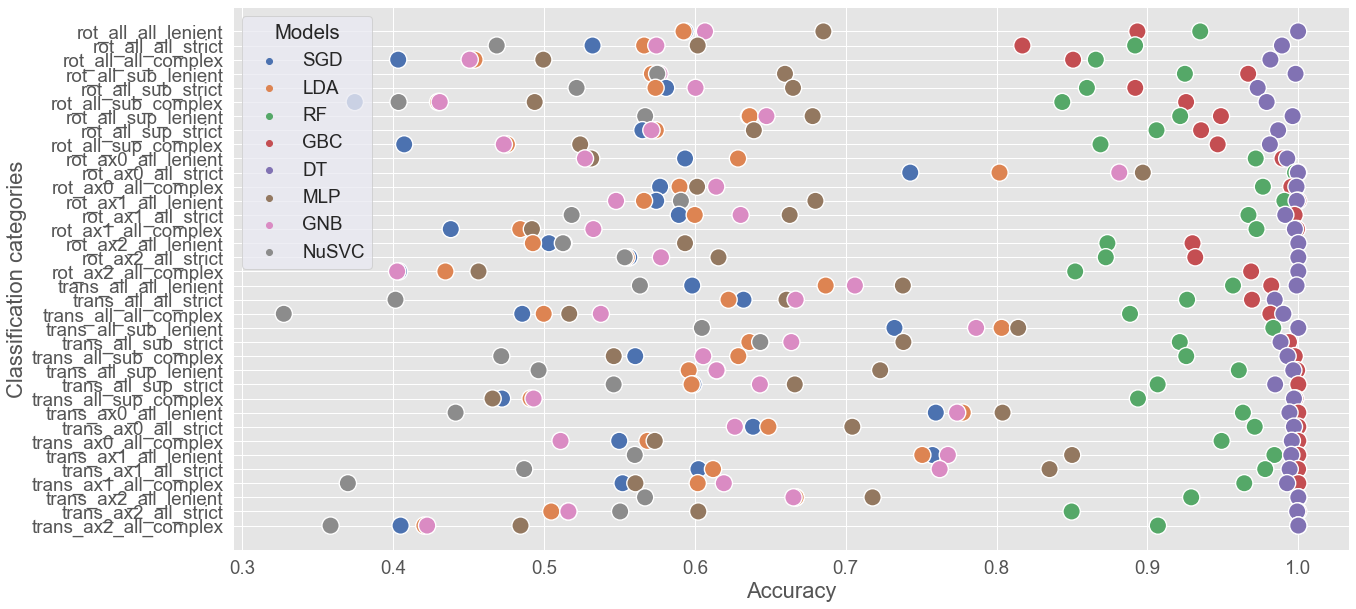

In [116]:
# Scatterplot accuracy big

# we want model to replace fea


# Only look at fea = 0 : all features
# fea_list = ['all', 'top3', 'top2', 'top1']
df_allfea = df2plot[(df2plot.fea == 'all')]

import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(20,10))

sns.set(font_scale = 1.7)
sns.scatterplot(x=df_allfea["acc_cv_test_sca"], y=df_allfea["plot_label"], hue=df_allfea["Models"], alpha = 1, s=300, legend=True)

# ax[0].set_ylabel(fontsize=22)
ax.set_ylabel('Classification categories', fontsize=22)

ax.set_xlabel('Accuracy', fontsize=22)

## Plotting categories PER model - color with respect to features used

In [ ]:
# Scatterplot accuracy big

import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(20,10))

sns.set(font_scale = 1.7)

# m_name_list = ['SGD', 'LDA', 'RF', 'GBC', 'DT', 'MLP', 'GNB', 'NuSVC']

mod = 'GBC'
df_permod = df2plot[(df2plot.Models == mod)]

sns.scatterplot(x=df_permod["acc_cv_test_sca"], y=df_permod["plot_label"], hue=df_permod["fea"], alpha = 1, s=300, legend=True)

# ax[0].set_ylabel(fontsize=22)
ax.set_ylabel('Classification categories : %s' % (mod), fontsize=22)

ax.set_xlabel('Accuracy', fontsize=22)

# Final paper plot 0 : Each plot per Accuracy and ROC AUC

In [7]:
df2plot.fea.value_counts()

all     288
top3    288
top2    288
top1    288
Name: fea, dtype: int64

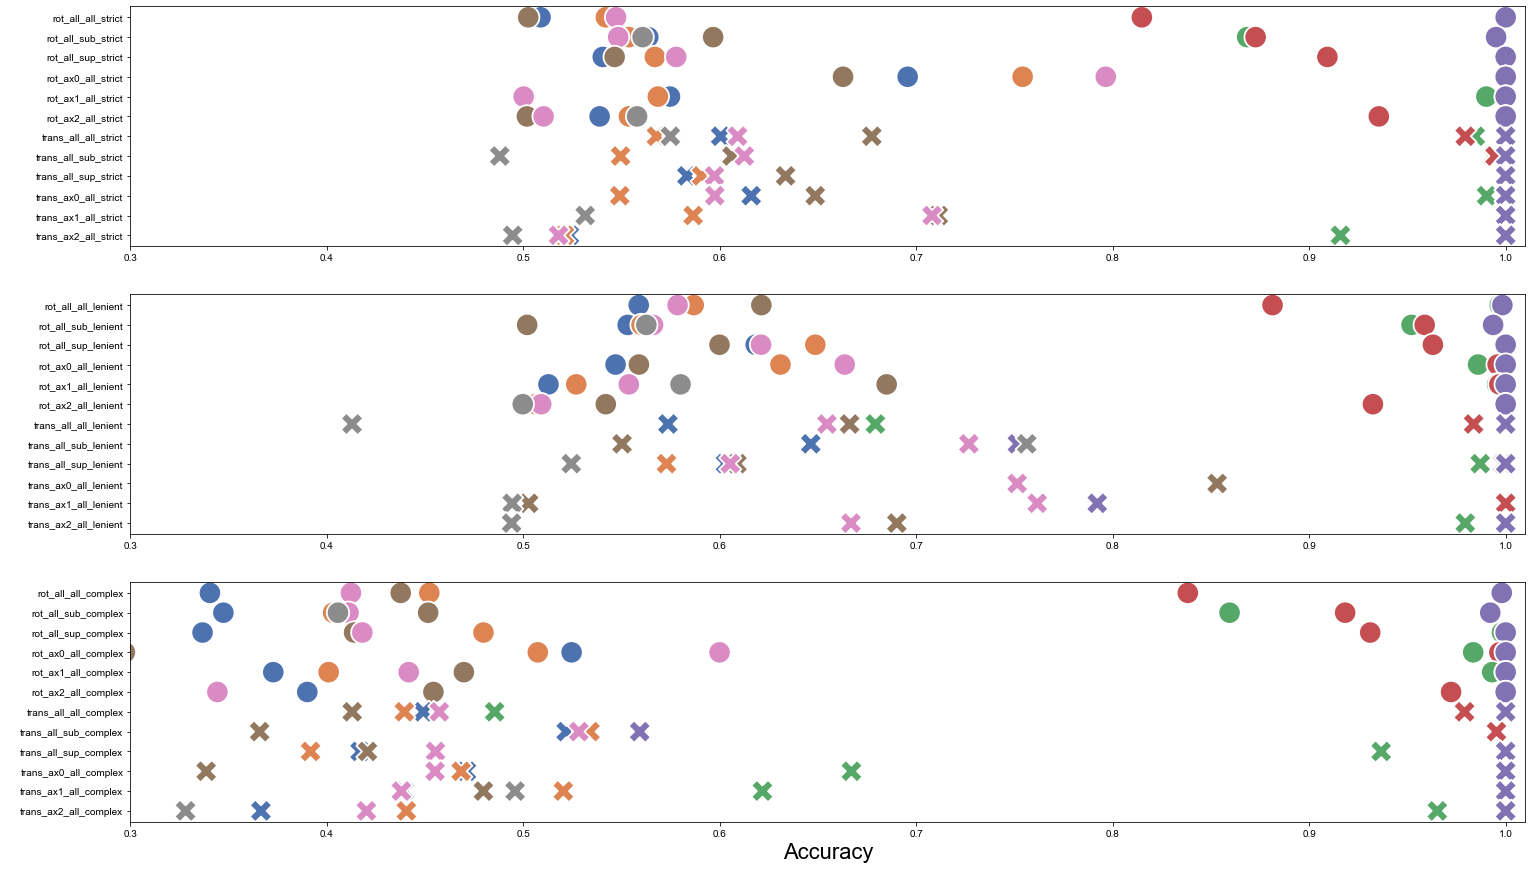

In [8]:
# Scatterplot accuracy looking at all data, sub, sup separately

# out_acc_s = df2plot[(df2plot.y == 'strict')]
# out_acc_l = df2plot[(df2plot.y == 'lenient')]
# out_acc_c = df2plot[(df2plot.y == 'complex')]

# out_acc_s = df2plot[(df2plot.y == 'strict') & (df2plot.fea == 'all')]
# out_acc_l = df2plot[(df2plot.y == 'lenient') & (df2plot.fea == 'all')]
# out_acc_c = df2plot[(df2plot.y == 'complex') & (df2plot.fea == 'all')]

out_acc_s = df2plot[(df2plot.y == 'strict') & (df2plot.fea == 'top1')]
out_acc_l = df2plot[(df2plot.y == 'lenient') & (df2plot.fea == 'top1')]
out_acc_c = df2plot[(df2plot.y == 'complex') & (df2plot.fea == 'top1')]

import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(3, 1, figsize=(25,15))

sns.set(font_scale = 1.7) # default is without style and palette

l1 = sns.scatterplot(x=out_acc_s["acc_cv_test_sca"], y=out_acc_s["plot_label"], hue=out_acc_s["Models"], style=out_acc_s["exp"], ax=ax[0], alpha = 1, s=500, legend=False)
sns.scatterplot(x=out_acc_l["acc_cv_test_sca"], y=out_acc_l["plot_label"], hue=out_acc_l["Models"], style=out_acc_l["exp"], ax=ax[1], alpha = 1, s=500, legend=False)
sns.scatterplot(x=out_acc_c["acc_cv_test_sca"], y=out_acc_c["plot_label"], hue=out_acc_c["Models"], style=out_acc_c["exp"], ax=ax[2], alpha = 1, s=500, legend=False)

# l1 = sns.scatterplot(x=out_acc_s["acc_train"], y=out_acc_s["plot_label"], hue=out_acc_s["Models"], style=out_acc_s["exp"], ax=ax[0], alpha = 1, s=500, legend=False)
# sns.scatterplot(x=out_acc_l["acc_train"], y=out_acc_l["plot_label"], hue=out_acc_l["Models"], style=out_acc_l["exp"], ax=ax[1], alpha = 1, s=500, legend=False)
# sns.scatterplot(x=out_acc_c["acc_train"], y=out_acc_c["plot_label"], hue=out_acc_c["Models"], style=out_acc_c["exp"], ax=ax[2], alpha = 1, s=500, legend=False)




# ax[0].set_ylabel(fontsize=22)
ax[0].set_ylabel('', fontsize=22)
ax[1].set_ylabel(' ')
ax[2].set_ylabel(' ')
# ax[1].set_yticks([])

ax[0].set_xlabel('', fontsize=22)
# ax[1].set_xlabel('Accuracy', fontsize=22)
ax[1].set_xlabel('', fontsize=22)
ax[2].set_xlabel('Accuracy', fontsize=22)

ax[0].set_xlim([0.3, 1.01])
ax[1].set_xlim([0.3, 1.01])
ax[2].set_xlim([0.3, 1.01])

# To make legend appear : uncomment lines below, and remove (legend=False from the last scatterplot)
# m_name_list = ['', '','SGD', 'LDA', 'RF', 'GBC', 'DT', 'MLP', 'GNB', 'NuSVC']
# plt.legend([l1], labels=m_name_list, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.1,title="Models")

plt.savefig('C:\\Users\\jamilah\\Documents\\Github_analysis_PROJECTS\\Motor_classification\\e_classification\\Accuracy_comparisons_final_train.png')

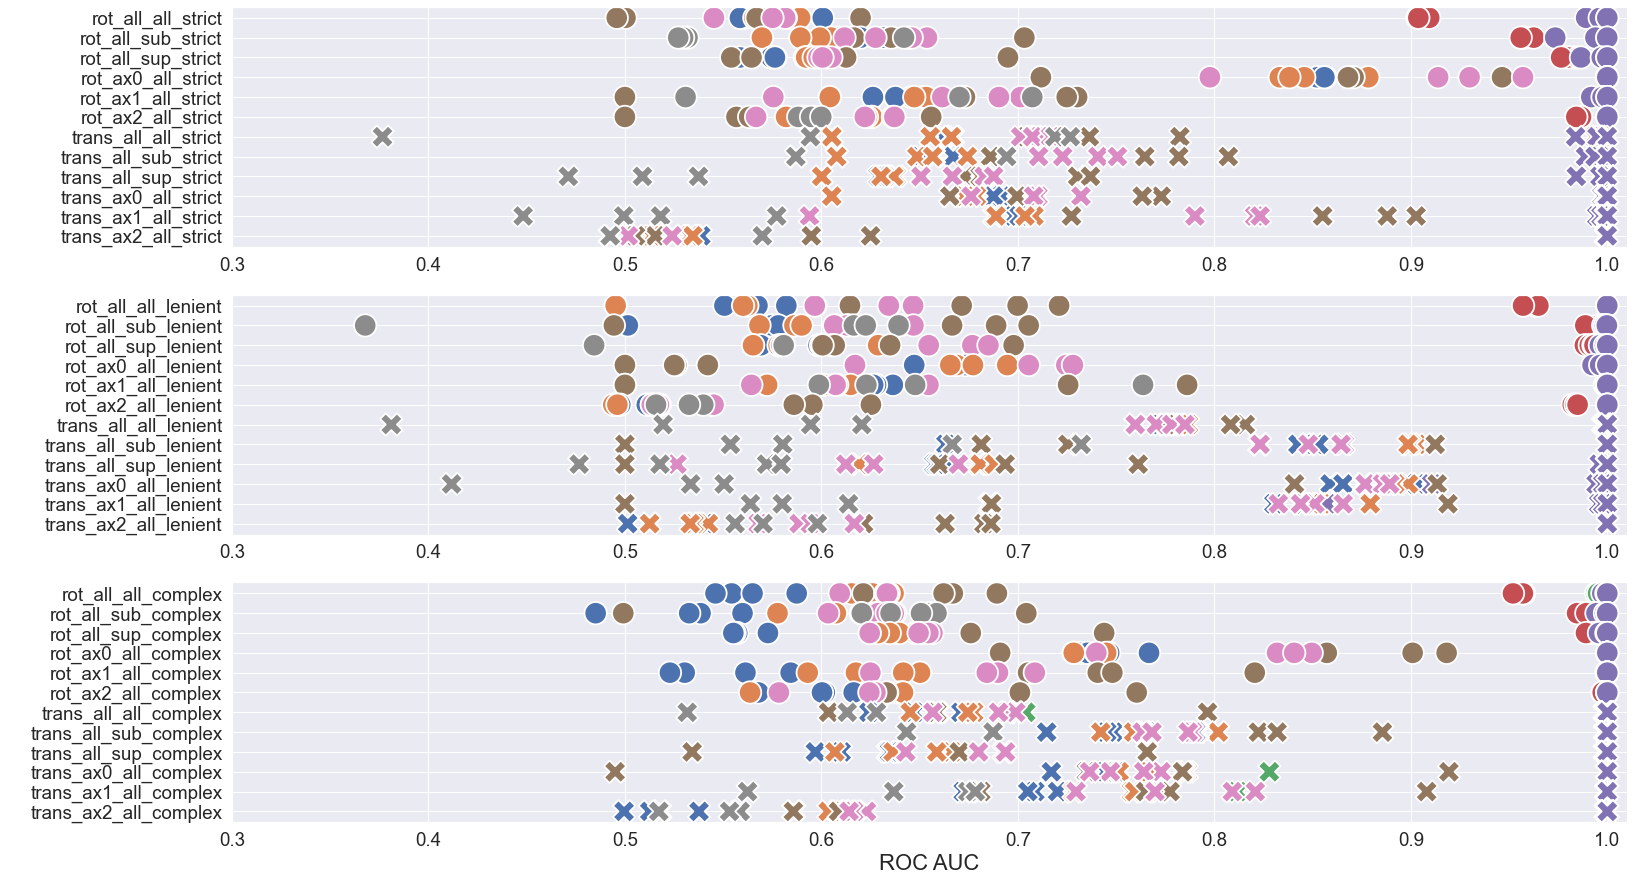

In [118]:
# Scatterplot accuracy looking at all data, sub, sup separately

out_acc_s = df2plot[(df2plot.y == 'strict')]
out_acc_l = df2plot[(df2plot.y == 'lenient')]
out_acc_c = df2plot[(df2plot.y == 'complex')]

# out_acc_s = df2plot[(df2plot.y == 'strict') & (df2plot.fea == 'all')]
# out_acc_l = df2plot[(df2plot.y == 'lenient') & (df2plot.fea == 'all')]
# out_acc_c = df2plot[(df2plot.y == 'complex') & (df2plot.fea == 'all')]

import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(3, 1, figsize=(25,15))

sns.set(font_scale = 1.7) # default is without style and palette

# x categories to show : 'acc_cv_test_sca', 'prec_cv_test_sca', 'recall_cv_test_sca', 'roc_cv_test_sca'

l1 = sns.scatterplot(x=out_acc_s["roc_cv_test_sca"], y=out_acc_s["plot_label"], hue=out_acc_s["Models"], style=out_acc_s["exp"], ax=ax[0], alpha = 1, s=500, legend=False)
sns.scatterplot(x=out_acc_l["roc_cv_test_sca"], y=out_acc_l["plot_label"], hue=out_acc_l["Models"], style=out_acc_l["exp"], ax=ax[1], alpha = 1, s=500, legend=False)
sns.scatterplot(x=out_acc_c["roc_auc_test"], y=out_acc_c["plot_label"], hue=out_acc_c["Models"], style=out_acc_c["exp"], ax=ax[2], alpha = 1, s=500, legend=False)

# ax[0].set_ylabel(fontsize=22)
ax[0].set_ylabel('', fontsize=22)
ax[1].set_ylabel(' ')
ax[2].set_ylabel(' ')
# ax[1].set_yticks([])

ax[0].set_xlabel('', fontsize=22)
# ax[1].set_xlabel('Accuracy', fontsize=22)
ax[1].set_xlabel('', fontsize=22)
ax[2].set_xlabel('ROC AUC', fontsize=22)

ax[0].set_xlim([0.3, 1.01])
ax[1].set_xlim([0.3, 1.01])
ax[2].set_xlim([0.3, 1.01])
m_name_list = ['','SGD', 'LDA', 'RF', 'GBC', 'DT', 'MLP', 'GNB', 'NuSVC']
# Put the legend out of the figure

# plt.legend([l1], labels= m_name_list, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.1,title="Legend Title")

plt.savefig('C:\\Users\\jamilah\\Documents\\Github_analysis_PROJECTS\\Motor_classification\\e_classification\\ROCAUC_comparisons_final.png')

# Final paper plot 1 : each plot of accuracy and roc per label

## Mixed accuracy and roc_auc figure : strict

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

out_s = df2plot[(df2plot.y == 'strict') & (df2plot.fea == 'all')]
out_l = df2plot[(df2plot.y == 'lenient') & (df2plot.fea == 'all')]
out_c = df2plot[(df2plot.y == 'complex') & (df2plot.fea == 'all')]

ynam = 'Strict'

# x categories to show : 'acc_cv_test_sca', 'prec_cv_test_sca', 'recall_cv_test_sca', 'roc_cv_test_sca'

fig, ax = plt.subplots(2, 1, figsize=(20,10))

sns.set(font_scale = 1.7) # default is without style and palette
sns.scatterplot(x=out_s["acc_cv_test_sca"], y=out_s["plot_label"], hue=out_s["Models"], style=out_s["exp"], ax=ax[0], alpha = 1, s=500, legend=False)
sns.scatterplot(x=out_s["roc_cv_test_sca"], y=out_s["plot_label"], hue=out_s["Models"], style=out_s["exp"], ax=ax[1], alpha = 1, s=500, legend=False)

# ax[0].set_ylabel(fontsize=22)
ax[0].set_ylabel('', fontsize=22)
ax[1].set_ylabel(' ')
# ax[1].set_yticks([])

ax[0].set_xlabel('%s : Accuracy' % (ynam), fontsize=22)
ax[1].set_xlabel('%s : ROC AUC' % (ynam), fontsize=22)

ax[0].set_xlim([0.3, 1.01])
ax[1].set_xlim([0.3, 1.01])

plt.tight_layout()
plt.savefig('C:\\Users\\jamilah\\Documents\\Github_analysis_PROJECTS\\Motor_classification\\e_classification\\Comparisons_strict_final.png')

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

out_s = df2plot[(df2plot.y == 'strict') & (df2plot.fea == 'all')]
out_l = df2plot[(df2plot.y == 'lenient') & (df2plot.fea == 'all')]
out_c = df2plot[(df2plot.y == 'complex') & (df2plot.fea == 'all')]

ynam = 'Lenient'

# x categories to show : 'acc_cv_test_sca', 'prec_cv_test_sca', 'recall_cv_test_sca', 'roc_cv_test_sca'

fig, ax = plt.subplots(2, 1, figsize=(20,10))

sns.set(font_scale = 1.7) # default is without style and palette
sns.scatterplot(x=out_l["acc_cv_test_sca"], y=out_l["plot_label"], hue=out_l["Models"], style=out_l["exp"], ax=ax[0], alpha = 1, s=500, legend=False)
sns.scatterplot(x=out_l["roc_cv_test_sca"], y=out_l["plot_label"], hue=out_l["Models"], style=out_l["exp"], ax=ax[1], alpha = 1, s=500, legend=False)

# ax[0].set_ylabel(fontsize=22)
ax[0].set_ylabel('', fontsize=22)
ax[1].set_ylabel(' ')
# ax[1].set_yticks([])

ax[0].set_xlabel('%s : Accuracy' % (ynam), fontsize=22)
ax[1].set_xlabel('%s : ROC AUC' % (ynam), fontsize=22)

ax[0].set_xlim([0.4, 1.01])
ax[1].set_xlim([0.4, 1.01])

plt.tight_layout()
plt.savefig('C:\\Users\\jamilah\\Documents\\Github_analysis_PROJECTS\\Motor_classification\\e_classification\\Comparisons_lenient_final.png')

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

out_s = df2plot[(df2plot.y == 'strict') & (df2plot.fea == 'all')]
out_l = df2plot[(df2plot.y == 'lenient') & (df2plot.fea == 'all')]
out_c = df2plot[(df2plot.y == 'complex') & (df2plot.fea == 'all')]

ynam = 'Complex'

# x categories to show : 'acc_cv_test_sca', 'prec_cv_test_sca', 'recall_cv_test_sca', 'roc_cv_test_sca'

fig, ax = plt.subplots(2, 1, figsize=(20,10))

sns.set(font_scale = 1.7) # default is without style and palette
sns.scatterplot(x=out_c["acc_cv_test_sca"], y=out_c["plot_label"], hue=out_c["Models"], style=out_c["exp"], ax=ax[0], alpha = 1, s=500, legend=False)
sns.scatterplot(x=out_c["roc_auc_test"], y=out_c["plot_label"], hue=out_c["Models"], style=out_c["exp"], ax=ax[1], alpha = 1, s=500, legend=False)

# ax[0].set_ylabel(fontsize=22)
ax[0].set_ylabel('', fontsize=22)
ax[1].set_ylabel(' ')
# ax[1].set_yticks([])

ax[0].set_xlabel('%s : Accuracy' % (ynam), fontsize=22)
ax[1].set_xlabel('%s : ROC AUC' % (ynam), fontsize=22)

ax[0].set_xlim([0.3, 1.01])
ax[1].set_xlim([0.3, 1.01])


plt.tight_layout()
plt.savefig('C:\\Users\\jamilah\\Documents\\Github_analysis_PROJECTS\\Motor_classification\\e_classification\\Comparisons_%s_final.png' % (ynam))

# Plotting feature importance order

## seaborn : 

But can not control the x-axis order because it is driven by the data

In [5]:
def reduce_df(out_s):
    plot_label = out_s.plot_label.to_numpy()
    Models = out_s.Models.to_numpy()

    plot_label2 = []
    for i in range(len(plot_label)):
        plot_label2.append('%s_%s' % (plot_label[i], Models[i]))
    
    v0 = pd.Series(out_s.exp.to_numpy())
    v1 = pd.Series(out_s.per_order_1.to_numpy())
    v2 = pd.Series(out_s.per_order_2.to_numpy())
    v3 = pd.Series(out_s.per_order_3.to_numpy())
    col0 = pd.Series(plot_label2)
    out_s2 = pd.concat([v0, v1, v2, v3, col0], axis=1)

    columns = ['exp', 'per_order_1', 'per_order_2', 'per_order_3', 'plot_label2']
    #columns = ['exp', 'ax', 'ss', 'fea', 'm_name', 'y', 'acc_train', 'prec_train', 'recall_train', 'roc_auc_train', 'acc_test', 'prec_test', 'recall_test', 'roc_auc_test', 'acc_cv_test', 'prec_cv_test', 'recall_cv_test', 'roc_auc_cv_test', 'ord_pr', 'plot_label', 'acc_cv_test_sca', 'prec_cv_test_sca', 'recall_cv_test_sca', 'roc_cv_test_sca', 'per_order_1', 'per_order_2', 'per_order_3', 'plot_label2']

    # rename the columns
    out_s2.columns = columns
    
    return out_s2

In [6]:
# Scatterplot accuracy looking at all data, sub, sup separately

out_s = df2plot[(df2plot.y == 'strict') & (df2plot.fea == 'all') & (df2plot.ax == 'all') & (df2plot.ss == 'all')]
out_l = df2plot[(df2plot.y == 'lenient') & (df2plot.fea == 'all') & (df2plot.ax == 'all') & (df2plot.ss == 'all')]
out_c = df2plot[(df2plot.y == 'complex') & (df2plot.fea == 'all') & (df2plot.ax == 'all') & (df2plot.ss == 'all')]

out_s2 = reduce_df(out_s)
out_l2 = reduce_df(out_l)
out_c2 = reduce_df(out_c)

C:\Users\jamilah\AppData\Local\Temp/ipykernel_5440/3079218323.py:39: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend([l1], labels=['1st', '2nd', '3rd'], loc='best', bbox_to_anchor=(0.5, 0., 0.5, 0.5) , borderaxespad=0.1,title="Feature Importance")


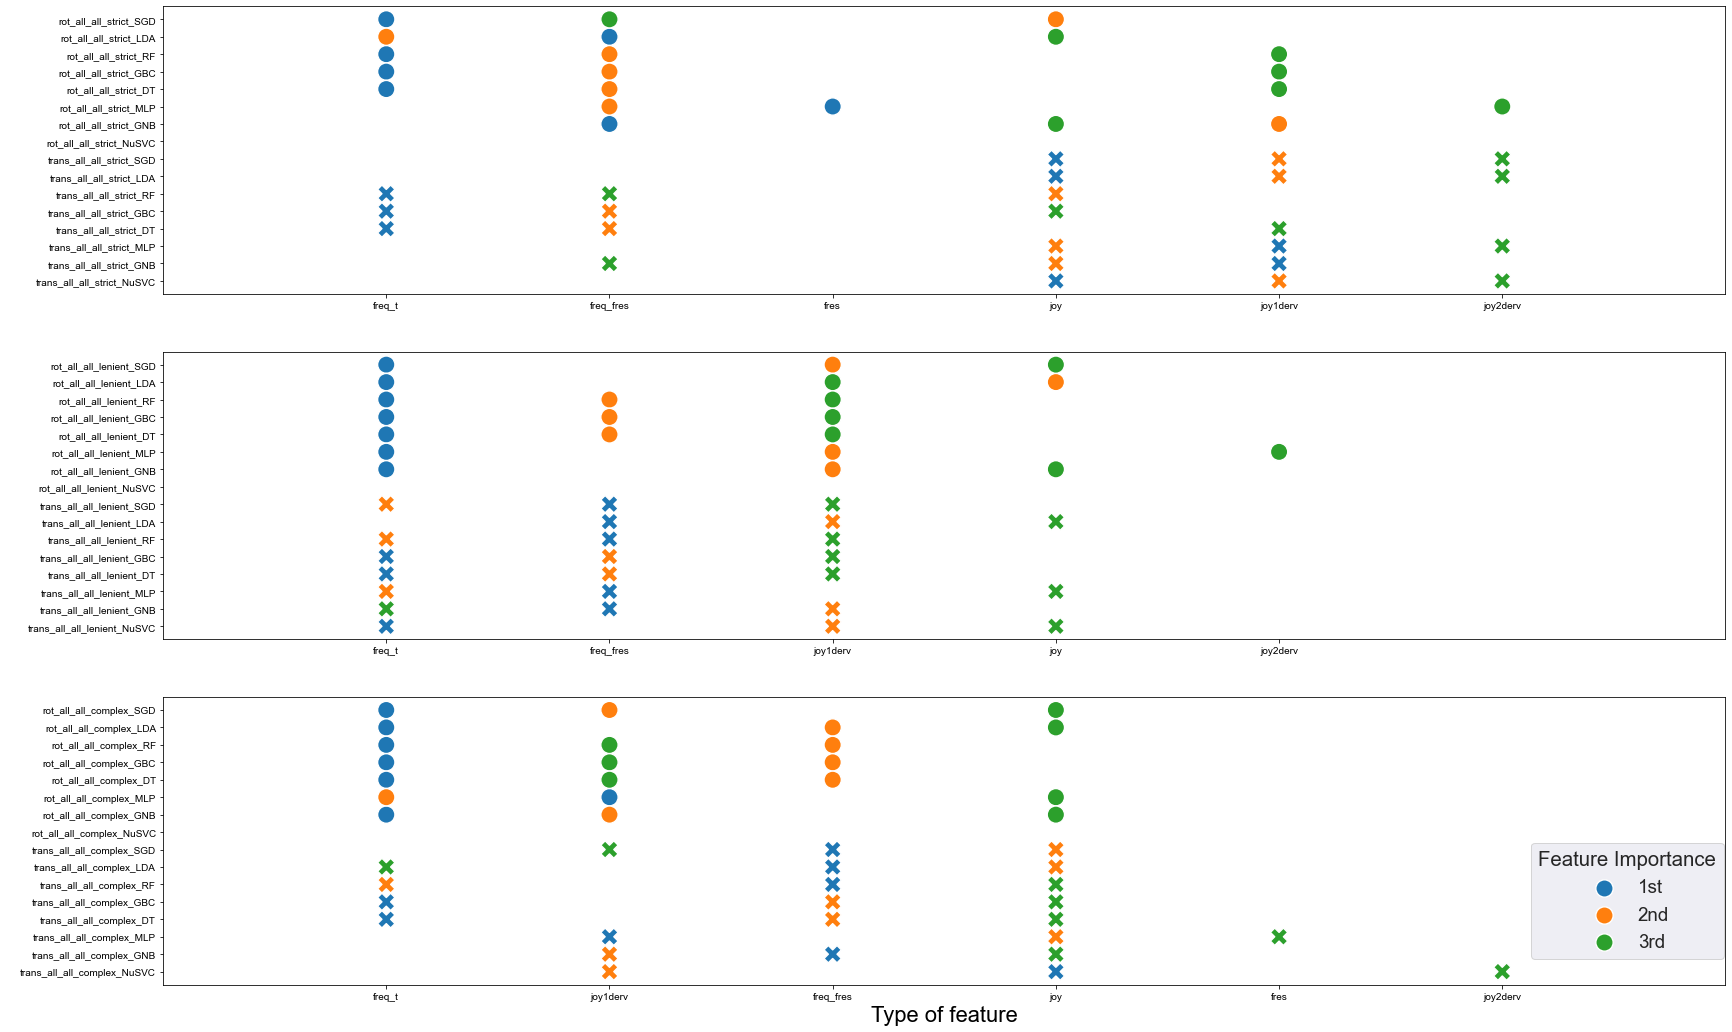

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(3, 1, figsize=(28,18))

dot_size = 300

sns.set(font_scale = 1.7) # default is without style and palette
l1 = sns.scatterplot(x=out_s2["per_order_1"], y=out_s2["plot_label2"], style=out_s2['exp'], ax=ax[0], alpha=1, s=dot_size, legend=False)
sns.scatterplot(x=out_s2["per_order_2"], y=out_s2["plot_label2"], style=out_s2['exp'],  ax=ax[0], alpha=1, s=dot_size, legend=False)
sns.scatterplot(x=out_s2["per_order_3"], y=out_s2["plot_label2"], style=out_s2['exp'],  ax=ax[0], alpha=1, s=dot_size, legend=False)

sns.scatterplot(x=out_l2["per_order_1"], y=out_l2["plot_label2"], style=out_l2['exp'], ax=ax[1], alpha=1, s=dot_size, legend=False)
sns.scatterplot(x=out_l2["per_order_2"], y=out_l2["plot_label2"], style=out_l2['exp'], ax=ax[1], alpha=1, s=dot_size, legend=False)
sns.scatterplot(x=out_l2["per_order_3"], y=out_l2["plot_label2"], style=out_l2['exp'], ax=ax[1], alpha=1, s=dot_size, legend=False)

sns.scatterplot(x=out_c2["per_order_1"], y=out_c2["plot_label2"], style=out_c2['exp'], ax=ax[2], alpha=1, s=dot_size, legend=False)
sns.scatterplot(x=out_c2["per_order_2"], y=out_c2["plot_label2"], style=out_c2['exp'], ax=ax[2], alpha=1, s=dot_size, legend=False)
sns.scatterplot(x=out_c2["per_order_3"], y=out_c2["plot_label2"], style=out_c2['exp'], ax=ax[2], alpha=1, s=dot_size)

# ax[0].set_ylabel(fontsize=22)
ax[0].set_ylabel('', fontsize=22)
ax[1].set_ylabel(' ')
ax[2].set_ylabel(' ')
# ax[1].set_yticks([])

ax[0].set_xlabel('', fontsize=22)
# ax[1].set_xlabel('Precision', fontsize=22)
ax[1].set_xlabel('', fontsize=22)
ax[2].set_xlabel('Type of feature', fontsize=22)

ax[0].set_xlim([-1, 6])
ax[1].set_xlim([-1, 6])
ax[2].set_xlim([-1, 6])
# ax[0].set_xticklabels(['joy', 'joy1derv', 'joy2derv', 'fres', 'freq_t', 'freq_fres'])  # Set text labels
# ax[1].set_xticklabels(['joy', 'joy1derv', 'joy2derv', 'fres', 'freq_t', 'freq_fres'])  # Set text labels
# ax[2].set_xticklabels(['joy', 'joy1derv', 'joy2derv', 'fres', 'freq_t', 'freq_fres'])  # Set text labels

plt.legend([l1], labels=['1st', '2nd', '3rd'], loc='best', bbox_to_anchor=(0.5, 0., 0.5, 0.5) , borderaxespad=0.1,title="Feature Importance")


# plt.savefig('C:\\Users\\jamilah\\Documents\\Github_analysis_PROJECTS\\Motor_classification\\e_classification\\Feature_comparisons_final.png')

# Negative can not put the legend on because the data is not stacked to give the hue a value

## Mathplotlib

In [8]:
def cat_2_num(catvec):
    numvec = []
    for i in catvec:
        #print( 'i:', i)
        [newvec, ind_newvec] = findall(xlab_order, '==', i)
        #print('ind_newvec:', ind_newvec)
        ind_str = [str(j) for j in ind_newvec]
        if not any(ind_str):
            numvec.append(np.nan)
        else:
            numvec.append(int(ind_str[0]))
    
    return numvec

In [9]:
def get_y_index(x):
    y = []
    x_nonan = []
    for i, doc in enumerate(x):
        if np.isnan(doc) == False:
            y.append(i)
            x_nonan.append(doc)
    return x_nonan, y

C:\Users\jamilah\AppData\Local\Temp/ipykernel_5440/1167559545.py:115: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.tight_layout()


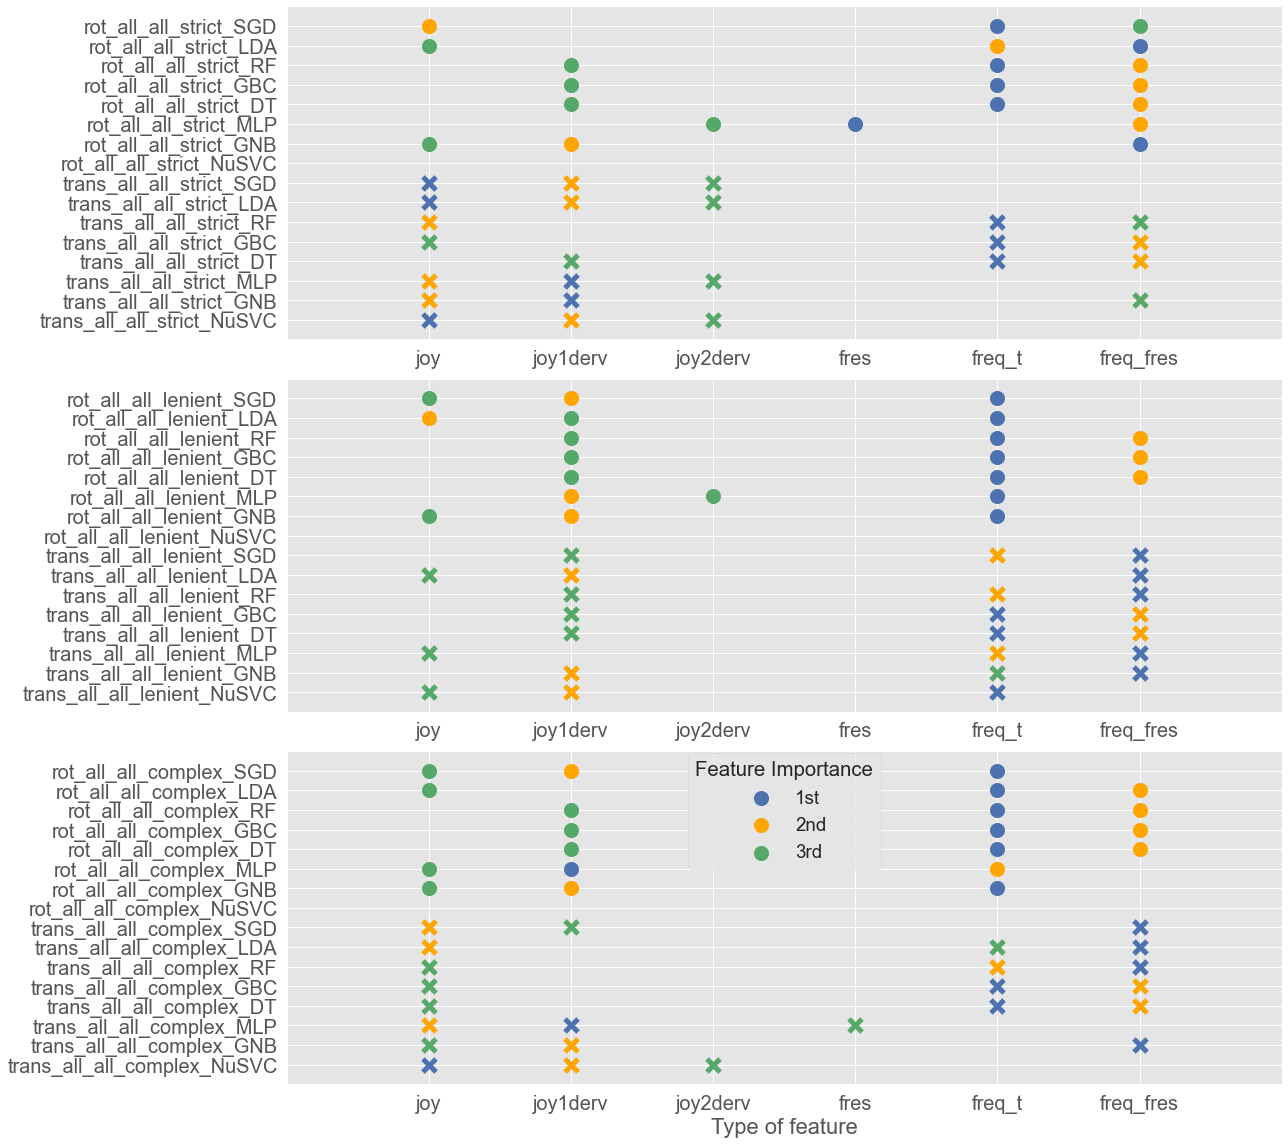

<Figure size 1296x1152 with 0 Axes>

In [41]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')  # prints a nice shaded background

textsize = 20
size = 170
atrans = 1
linewidx = 5
linecir = 2

#plt.rcParams["figure.figsize"] = (18,16)  # change figure size

#fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, constrained_layout=True)
fig, (ax0, ax1, ax2) = plt.subplots(3, 1, constrained_layout=True)

xlab_order = ['joy', 'joy1derv', 'joy2derv', 'fres', 'freq_t', 'freq_fres']

top1_num = cat_2_num(make_a_properlist(out_s2.per_order_1.to_numpy()))
top2_num = cat_2_num(make_a_properlist(out_s2.per_order_2.to_numpy()))
top3_num = cat_2_num(make_a_properlist(out_s2.per_order_3.to_numpy()))
labels = make_a_properlist(out_s2.plot_label2.to_numpy())

# Invert the values because on the y axis the top value is the last entry
top1_num_ivt = top1_num[::-1]
top2_num_ivt = top2_num[::-1]
top3_num_ivt = top3_num[::-1]
labels_ivt = labels[::-1]

top1_num_nonan, yyORG_top1 = get_y_index(top1_num_ivt)
top2_num_nonan, yyORG_top2 = get_y_index(top2_num_ivt)
top3_num_nonan, yyORG_top3 = get_y_index(top3_num_ivt)

# , edgecolors="red"
ax0.scatter(top1_num_nonan[8::], yyORG_top1[8::], s=size, c="b", alpha=atrans, marker="o", linewidths=linecir)
ax0.scatter(top2_num_nonan[8::], yyORG_top2[8::], s=size, c="orange", alpha=atrans, marker="o", linewidths=linecir)
ax0.scatter(top3_num_nonan[8::], yyORG_top3[8::], s=size, c="g", alpha=atrans, marker="o", linewidths=linecir)

ax0.scatter(top1_num_nonan[0:8], yyORG_top1[0:8], s=size, c="b", alpha=atrans, marker="x", linewidths=linewidx)
ax0.scatter(top2_num_nonan[0:8], yyORG_top2[0:8], s=size, c="orange", alpha=atrans, marker="x", linewidths=linewidx)
ax0.scatter(top3_num_nonan[0:8], yyORG_top3[0:8], s=size, c="g", alpha=atrans, marker="x", linewidths=linewidx)

ax0.set_xlim(-1, 6)
ax0.set_ylim(-1, 16)
ax0.set_yticks(range(len(labels_ivt)), labels=labels_ivt, fontsize=textsize)  #, rotation=90
ax0.set_xticks([0, 1, 2, 3, 4, 5, 6], labels=['joy', 'joy1derv', 'joy2derv', 'fres', 'freq_t', 'freq_fres', ''], fontsize=textsize)


# ---------------------------------------------------

top1_num = cat_2_num(make_a_properlist(out_l2.per_order_1.to_numpy()))
top2_num = cat_2_num(make_a_properlist(out_l2.per_order_2.to_numpy()))
top3_num = cat_2_num(make_a_properlist(out_l2.per_order_3.to_numpy()))
labels = make_a_properlist(out_l2.plot_label2.to_numpy())

# Invert the values because on the y axis the top value is the last entry
top1_num_ivt = top1_num[::-1]
top2_num_ivt = top2_num[::-1]
top3_num_ivt = top3_num[::-1]
labels_ivt = labels[::-1]

top1_num_nonan, yyORG_top1 = get_y_index(top1_num_ivt)
top2_num_nonan, yyORG_top2 = get_y_index(top2_num_ivt)
top3_num_nonan, yyORG_top3 = get_y_index(top3_num_ivt)

ax1.scatter(top1_num_nonan[8::], yyORG_top1[8::], s=size, c="b", alpha=atrans, marker="o", linewidths=linecir)
ax1.scatter(top2_num_nonan[8::], yyORG_top2[8::], s=size, c="orange", alpha=atrans, marker="o", linewidths=linecir)
ax1.scatter(top3_num_nonan[8::], yyORG_top3[8::], s=size, c="g", alpha=atrans, marker="o", linewidths=linecir)

ax1.scatter(top1_num_nonan[0:8], yyORG_top1[0:8], s=size, c="b", alpha=atrans, marker="x", linewidths=linewidx)
ax1.scatter(top2_num_nonan[0:8], yyORG_top2[0:8], s=size, c="orange", alpha=atrans, marker="x", linewidths=linewidx)
ax1.scatter(top3_num_nonan[0:8], yyORG_top3[0:8], s=size, c="g", alpha=atrans, marker="x", linewidths=linewidx)

ax1.set_xlim(-1, 6)
ax1.set_ylim(-1, 16)
ax1.set_yticks(range(len(labels_ivt)), labels=labels_ivt, fontsize=textsize)  #, rotation=90
ax1.set_xticks([0, 1, 2, 3, 4, 5, 6], labels=['joy', 'joy1derv', 'joy2derv', 'fres', 'freq_t', 'freq_fres', ''], fontsize=textsize)


# ---------------------------------------------------

top1_num = cat_2_num(make_a_properlist(out_c2.per_order_1.to_numpy()))
top2_num = cat_2_num(make_a_properlist(out_c2.per_order_2.to_numpy()))
top3_num = cat_2_num(make_a_properlist(out_c2.per_order_3.to_numpy()))
labels = make_a_properlist(out_c2.plot_label2.to_numpy())

# Invert the values because on the y axis the top value is the last entry
top1_num_ivt = top1_num[::-1]
top2_num_ivt = top2_num[::-1]
top3_num_ivt = top3_num[::-1]
labels_ivt = labels[::-1]

top1_num_nonan, yyORG_top1 = get_y_index(top1_num_ivt)
top2_num_nonan, yyORG_top2 = get_y_index(top2_num_ivt)
top3_num_nonan, yyORG_top3 = get_y_index(top3_num_ivt)

ax2.scatter(top1_num_nonan[8::], yyORG_top1[8::], s=size, c="b", alpha=atrans, marker="o", label="1st", linewidths=linecir)
ax2.scatter(top2_num_nonan[8::], yyORG_top2[8::], s=size, c="orange", alpha=atrans, marker="o", label="2nd", linewidths=linecir)
ax2.scatter(top3_num_nonan[8::], yyORG_top3[8::], s=size, c="g", alpha=atrans, marker="o", label="3rd", linewidths=linecir)

ax2.scatter(top1_num_nonan[0:8], yyORG_top1[0:8], s=size, c="b", alpha=atrans, marker="x", linewidths=linewidx)
ax2.scatter(top2_num_nonan[0:8], yyORG_top2[0:8], s=size, c="orange", alpha=atrans, marker="x", linewidths=linewidx)
ax2.scatter(top3_num_nonan[0:8], yyORG_top3[0:8], s=size, c="g", alpha=atrans, marker="x", linewidths=linewidx)

ax2.set_xlim(-1, 6)
ax2.set_ylim(-1, 16)
ax2.set_yticks(range(len(labels_ivt)), labels=labels_ivt, fontsize=textsize)  #, rotation=90
ax2.set_xticks([0, 1, 2, 3, 4, 5, 6], labels=['joy', 'joy1derv', 'joy2derv', 'fres', 'freq_t', 'freq_fres', ''], fontsize=textsize)


ax2.set_xlabel('Type of feature', fontsize=22)
# ---------------------------------------------------

#plt.axis([-50, 100, -50, 100])

plt.legend(loc='best', borderaxespad=0.1, title="Feature Importance")
plt.tight_layout()
plt.show()

plt.savefig('C:\\Users\\jamilah\\Documents\\Github_analysis_PROJECTS\\Motor_classification\\e_classification\\Feature_comparisons_final_matplotlib.png', bbox_inches='tight', orientation="landscape")
# this does not work, I do not know why.  I reduce the screen size to 50% and took a screenshot

## Statistics

### Decision tree models: Both rotation and translation

In [99]:
def calc_nfmoinspos(mod_1st, mod_2nd, mod_3rd, mod_1st_count, mod_2nd_count, mod_3rd_count):
    
    mod_cat = [mod_1st[0], mod_2nd[0], mod_3rd[0]]
    mod_cat_cout = [mod_1st_count[0], mod_2nd_count[0], mod_3rd_count[0]]
    nat_freq = ['freq_t', 'freq_fres']
    
    pos = []
    n_freq = []
    for i, doc in enumerate(mod_cat):
        [newvec, ind_newvec] = findall(nat_freq, '==', doc)
        ind_str = [str(j) for j in ind_newvec]
        if not any(ind_str):
            # Opt based
            pos.append(mod_cat_cout[i])
        else:
            n_freq.append(mod_cat_cout[i])


    nf_moins_pos = np.sum(n_freq) - np.sum(pos)
    
    return nf_moins_pos, n_freq, pos, mod_cat

In [100]:
# Decision tree models: Both rotation and translation
# Count the features for 1st, 2nd, and 3rd
dt_1st_strict = out_s2.per_order_1[(out_s2.plot_label2 == 'rot_all_all_strict_RF') | (out_s2.plot_label2 == 'rot_all_all_strict_GBC') | (out_s2.plot_label2 == 'rot_all_all_strict_DT') | (out_s2.plot_label2 == 'trans_all_all_strict_RF') | (out_s2.plot_label2 == 'trans_all_all_strict_GBC') | (out_s2.plot_label2 == 'trans_all_all_strict_DT')].value_counts()
dt_1st_strict1 = dt_1st_strict.index.to_numpy()
dt_1st_strict1_count = dt_1st_strict.to_numpy()
print('dt_1st_strict1: ', dt_1st_strict1)
print('dt_1st_strict1_count: ', dt_1st_strict1_count)

# Count the features for 1st, 2nd, and 3rd
dt_2nd_strict = out_s2.per_order_2[(out_s2.plot_label2 == 'rot_all_all_strict_RF') | (out_s2.plot_label2 == 'rot_all_all_strict_GBC') | (out_s2.plot_label2 == 'rot_all_all_strict_DT') | (out_s2.plot_label2 == 'trans_all_all_strict_RF') | (out_s2.plot_label2 == 'trans_all_all_strict_GBC') | (out_s2.plot_label2 == 'trans_all_all_strict_DT')].value_counts()
dt_2nd_strict1 = dt_2nd_strict.index.to_numpy()
dt_2nd_strict1_count = dt_2nd_strict.to_numpy()
print('dt_2nd_strict1: ', dt_2nd_strict1)
print('dt_2nd_strict1_count: ', dt_2nd_strict1_count)

# Count the features for 1st, 2nd, and 3rd
dt_3rd_strict = out_s2.per_order_3[(out_s2.plot_label2 == 'rot_all_all_strict_RF') | (out_s2.plot_label2 == 'rot_all_all_strict_GBC') | (out_s2.plot_label2 == 'rot_all_all_strict_DT') | (out_s2.plot_label2 == 'trans_all_all_strict_RF') | (out_s2.plot_label2 == 'trans_all_all_strict_GBC') | (out_s2.plot_label2 == 'trans_all_all_strict_DT')].value_counts()
dt_3rd_strict1 = dt_3rd_strict.index.to_numpy()
dt_3rd_strict1_count = dt_3rd_strict.to_numpy()
print('dt_3rd_strict1: ', dt_3rd_strict1)
print('dt_3rd_strict1_count: ', dt_3rd_strict1_count)

# ------------------------

# Count the features for 1st, 2nd, and 3rd
dt_1st_lenient = out_l2.per_order_1[(out_l2.plot_label2 == 'rot_all_all_lenient_RF') | (out_l2.plot_label2 == 'rot_all_all_lenient_GBC') | (out_l2.plot_label2 == 'rot_all_all_lenient_DT') | (out_l2.plot_label2 == 'trans_all_all_lenient_RF') | (out_l2.plot_label2 == 'trans_all_all_lenient_GBC') | (out_l2.plot_label2 == 'trans_all_all_lenient_DT')].value_counts()
dt_1st_lenient1 = dt_1st_lenient.index.to_numpy()
dt_1st_lenient1_count = dt_1st_lenient.to_numpy()
print('dt_1st_lenient1: ', dt_1st_lenient1)
print('dt_1st_lenient1_count: ', dt_1st_lenient1_count)

# Count the features for 1st, 2nd, and 3rd
dt_2nd_lenient = out_l2.per_order_2[(out_l2.plot_label2 == 'rot_all_all_lenient_RF') | (out_l2.plot_label2 == 'rot_all_all_lenient_GBC') | (out_l2.plot_label2 == 'rot_all_all_lenient_DT') | (out_l2.plot_label2 == 'trans_all_all_lenient_RF') | (out_l2.plot_label2 == 'trans_all_all_lenient_GBC') | (out_l2.plot_label2 == 'trans_all_all_lenient_DT')].value_counts()
dt_2nd_lenient1 = dt_2nd_lenient.index.to_numpy()
dt_2nd_lenient1_count = dt_2nd_lenient.to_numpy()
print('dt_2nd_lenient1: ', dt_2nd_lenient1)
print('dt_2nd_lenient1_count: ', dt_2nd_lenient1_count)

# Count the features for 1st, 2nd, and 3rd
dt_3rd_lenient = out_l2.per_order_3[(out_l2.plot_label2 == 'rot_all_all_lenient_RF') | (out_l2.plot_label2 == 'rot_all_all_lenient_GBC') | (out_l2.plot_label2 == 'rot_all_all_lenient_DT') | (out_l2.plot_label2 == 'trans_all_all_lenient_RF') | (out_l2.plot_label2 == 'trans_all_all_lenient_GBC') | (out_l2.plot_label2 == 'trans_all_all_lenient_DT')].value_counts()
dt_3rd_lenient1 = dt_3rd_lenient.index.to_numpy()
dt_3rd_lenient1_count = dt_3rd_lenient.to_numpy()
print('dt_3rd_lenient1: ', dt_3rd_lenient1)
print('dt_3rd_lenient1_count: ', dt_3rd_lenient1_count)

# ------------------------

# Count the features for 1st, 2nd, and 3rd
dt_1st_complex = out_c2.per_order_1[(out_c2.plot_label2 == 'rot_all_all_complex_RF') | (out_c2.plot_label2 == 'rot_all_all_complex_GBC') | (out_c2.plot_label2 == 'rot_all_all_complex_DT') | (out_c2.plot_label2 == 'trans_all_all_complex_RF') | (out_c2.plot_label2 == 'trans_all_all_complex_GBC') | (out_c2.plot_label2 == 'trans_all_all_complex_DT')].value_counts()
dt_1st_complex1 = dt_1st_complex.index.to_numpy()
dt_1st_complex1_count = dt_1st_complex.to_numpy()
print('dt_1st_complex1: ', dt_1st_complex1)
print('dt_1st_complex1_count: ', dt_1st_complex1_count)

# Count the features for 1st, 2nd, and 3rd
dt_2nd_complex = out_c2.per_order_2[(out_c2.plot_label2 == 'rot_all_all_complex_RF') | (out_c2.plot_label2 == 'rot_all_all_complex_GBC') | (out_c2.plot_label2 == 'rot_all_all_complex_DT') | (out_c2.plot_label2 == 'trans_all_all_complex_RF') | (out_c2.plot_label2 == 'trans_all_all_complex_GBC') | (out_c2.plot_label2 == 'trans_all_all_complex_DT')].value_counts()
dt_2nd_complex1 = dt_2nd_complex.index.to_numpy()
dt_2nd_complex1_count = dt_2nd_complex.to_numpy()
print('dt_2nd_complex1: ', dt_2nd_complex1)
print('dt_2nd_complex1_count: ', dt_2nd_complex1_count)

# Count the features for 1st, 2nd, and 3rd
dt_3rd_complex = out_c2.per_order_3[(out_c2.plot_label2 == 'rot_all_all_complex_RF') | (out_c2.plot_label2 == 'rot_all_all_complex_GBC') | (out_c2.plot_label2 == 'rot_all_all_complex_DT') | (out_c2.plot_label2 == 'trans_all_all_complex_RF') | (out_c2.plot_label2 == 'trans_all_all_complex_GBC') | (out_c2.plot_label2 == 'trans_all_all_complex_DT')].value_counts()
dt_3rd_complex1 = dt_3rd_complex.index.to_numpy()
dt_3rd_complex1_count = dt_3rd_complex.to_numpy()
print('dt_3rd_complex1: ', dt_3rd_complex1)
print('dt_3rd_complex1_count: ', dt_3rd_complex1_count)


# Summarize:  natural_freq - pos count
dt_nfmoinspos_strict_rottrans, n_freq, pos, dt_mods_nfmoinspos_strict_rottrans = calc_nfmoinspos(dt_1st_strict1, dt_2nd_strict1, dt_3rd_strict1, dt_1st_strict1_count, dt_2nd_strict1_count, dt_3rd_strict1_count)
print('dt_nfmoinspos_strict_rottrans: ', dt_nfmoinspos_strict_rottrans)

dt_nfmoinspos_lenient_rottrans, n_freq, pos, dt_mods_nfmoinspos_lenient_rottrans = calc_nfmoinspos(dt_1st_lenient1, dt_2nd_lenient1, dt_3rd_lenient1, dt_1st_lenient1_count, dt_2nd_lenient1_count, dt_3rd_lenient1_count)
print('dt_nfmoinspos_lenient_rottrans: ', dt_nfmoinspos_lenient_rottrans)

dt_nfmoinspos_complex_rottrans, n_freq, pos, dt_mods_nfmoinspos_complex_rottrans = calc_nfmoinspos(dt_1st_complex1, dt_2nd_complex1, dt_3rd_complex1, dt_1st_complex1_count, dt_2nd_complex1_count, dt_3rd_complex1_count)
print('dt_nfmoinspos_complex_rottrans: ', dt_nfmoinspos_complex_rottrans)

dt_1st_strict1:  ['freq_t']
dt_1st_strict1_count:  [6]
dt_2nd_strict1:  ['freq_fres' 'joy']
dt_2nd_strict1_count:  [5 1]
dt_3rd_strict1:  ['joy1derv' 'freq_fres' 'joy']
dt_3rd_strict1_count:  [4 1 1]
dt_1st_lenient1:  ['freq_t' 'freq_fres']
dt_1st_lenient1_count:  [5 1]
dt_2nd_lenient1:  ['freq_fres' 'freq_t']
dt_2nd_lenient1_count:  [5 1]
dt_3rd_lenient1:  ['joy1derv']
dt_3rd_lenient1_count:  [6]
dt_1st_complex1:  ['freq_t' 'freq_fres']
dt_1st_complex1_count:  [5 1]
dt_2nd_complex1:  ['freq_fres' 'freq_t']
dt_2nd_complex1_count:  [5 1]
dt_3rd_complex1:  ['joy1derv' 'joy']
dt_3rd_complex1_count:  [3 3]
dt_nfmoinspos_strict_rottrans:  7
dt_nfmoinspos_lenient_rottrans:  4
dt_nfmoinspos_complex_rottrans:  7


In [101]:
# Decision tree models: Rotation
# Count the features for 1st, 2nd, and 3rd
dt_1st_strict = out_s2.per_order_1[(out_s2.plot_label2 == 'rot_all_all_strict_RF') | (out_s2.plot_label2 == 'rot_all_all_strict_GBC') | (out_s2.plot_label2 == 'rot_all_all_strict_DT')].value_counts()
dt_1st_strict1 = dt_1st_strict.index.to_numpy()
dt_1st_strict1_count = dt_1st_strict.to_numpy()
print('dt_1st_strict1: ', dt_1st_strict1)
print('dt_1st_strict1_count: ', dt_1st_strict1_count)

# Count the features for 1st, 2nd, and 3rd
dt_2nd_strict = out_s2.per_order_2[(out_s2.plot_label2 == 'rot_all_all_strict_RF') | (out_s2.plot_label2 == 'rot_all_all_strict_GBC') | (out_s2.plot_label2 == 'rot_all_all_strict_DT')].value_counts()
dt_2nd_strict1 = dt_2nd_strict.index.to_numpy()
dt_2nd_strict1_count = dt_2nd_strict.to_numpy()
print('dt_2nd_strict1: ', dt_2nd_strict1)
print('dt_2nd_strict1_count: ', dt_2nd_strict1_count)

# Count the features for 1st, 2nd, and 3rd
dt_3rd_strict = out_s2.per_order_3[(out_s2.plot_label2 == 'rot_all_all_strict_RF') | (out_s2.plot_label2 == 'rot_all_all_strict_GBC') | (out_s2.plot_label2 == 'rot_all_all_strict_DT')].value_counts()
dt_3rd_strict1 = dt_3rd_strict.index.to_numpy()
dt_3rd_strict1_count = dt_3rd_strict.to_numpy()
print('dt_3rd_strict1: ', dt_3rd_strict1)
print('dt_3rd_strict1_count: ', dt_3rd_strict1_count)

# ------------------------

# Count the features for 1st, 2nd, and 3rd
dt_1st_lenient = out_l2.per_order_1[(out_l2.plot_label2 == 'rot_all_all_lenient_RF') | (out_l2.plot_label2 == 'rot_all_all_lenient_GBC') | (out_l2.plot_label2 == 'rot_all_all_lenient_DT')].value_counts()
dt_1st_lenient1 = dt_1st_lenient.index.to_numpy()
dt_1st_lenient1_count = dt_1st_lenient.to_numpy()
print('dt_1st_lenient1: ', dt_1st_lenient1)
print('dt_1st_lenient1_count: ', dt_1st_lenient1_count)

# Count the features for 1st, 2nd, and 3rd
dt_2nd_lenient = out_l2.per_order_2[(out_l2.plot_label2 == 'rot_all_all_lenient_RF') | (out_l2.plot_label2 == 'rot_all_all_lenient_GBC') | (out_l2.plot_label2 == 'rot_all_all_lenient_DT')].value_counts()
dt_2nd_lenient1 = dt_2nd_lenient.index.to_numpy()
dt_2nd_lenient1_count = dt_2nd_lenient.to_numpy()
print('dt_2nd_lenient1: ', dt_2nd_lenient1)
print('dt_2nd_lenient1_count: ', dt_2nd_lenient1_count)

# Count the features for 1st, 2nd, and 3rd
dt_3rd_lenient = out_l2.per_order_3[(out_l2.plot_label2 == 'rot_all_all_lenient_RF') | (out_l2.plot_label2 == 'rot_all_all_lenient_GBC') | (out_l2.plot_label2 == 'rot_all_all_lenient_DT')].value_counts()
dt_3rd_lenient1 = dt_3rd_lenient.index.to_numpy()
dt_3rd_lenient1_count = dt_3rd_lenient.to_numpy()
print('dt_3rd_lenient1: ', dt_3rd_lenient1)
print('dt_3rd_lenient1_count: ', dt_3rd_lenient1_count)

# ------------------------

# Count the features for 1st, 2nd, and 3rd
dt_1st_complex = out_c2.per_order_1[(out_c2.plot_label2 == 'rot_all_all_complex_RF') | (out_c2.plot_label2 == 'rot_all_all_complex_GBC') | (out_c2.plot_label2 == 'rot_all_all_complex_DT')].value_counts()
dt_1st_complex1 = dt_1st_complex.index.to_numpy()
dt_1st_complex1_count = dt_1st_complex.to_numpy()
print('dt_1st_complex1: ', dt_1st_complex1)
print('dt_1st_complex1_count: ', dt_1st_complex1_count)

# Count the features for 1st, 2nd, and 3rd
dt_2nd_complex = out_c2.per_order_2[(out_c2.plot_label2 == 'rot_all_all_complex_RF') | (out_c2.plot_label2 == 'rot_all_all_complex_GBC') | (out_c2.plot_label2 == 'rot_all_all_complex_DT')].value_counts()
dt_2nd_complex1 = dt_2nd_complex.index.to_numpy()
dt_2nd_complex1_count = dt_2nd_complex.to_numpy()
print('dt_2nd_complex1: ', dt_2nd_complex1)
print('dt_2nd_complex1_count: ', dt_2nd_complex1_count)

# Count the features for 1st, 2nd, and 3rd
dt_3rd_complex = out_c2.per_order_3[(out_c2.plot_label2 == 'rot_all_all_complex_RF') | (out_c2.plot_label2 == 'rot_all_all_complex_GBC') | (out_c2.plot_label2 == 'rot_all_all_complex_DT')].value_counts()
dt_3rd_complex1 = dt_3rd_complex.index.to_numpy()
dt_3rd_complex1_count = dt_3rd_complex.to_numpy()
print('dt_3rd_complex1: ', dt_3rd_complex1)
print('dt_3rd_complex1_count: ', dt_3rd_complex1_count)


# Summarize:  natural_freq - pos count
dt_nfmoinspos_strict_rot, n_freq, pos, dt_mods_nfmoinspos_strict_rot = calc_nfmoinspos(dt_1st_strict1, dt_2nd_strict1, dt_3rd_strict1, dt_1st_strict1_count, dt_2nd_strict1_count, dt_3rd_strict1_count)
print('dt_nfmoinspos_strict_rot: ', dt_nfmoinspos_strict_rot)

dt_nfmoinspos_lenient_rot, n_freq, pos, dt_mods_nfmoinspos_lenient_rot = calc_nfmoinspos(dt_1st_lenient1, dt_2nd_lenient1, dt_3rd_lenient1, dt_1st_lenient1_count, dt_2nd_lenient1_count, dt_3rd_lenient1_count)
print('dt_nfmoinspos_lenient_rot: ', dt_nfmoinspos_lenient_rot)

dt_nfmoinspos_complex_rot, n_freq, pos, dt_mods_nfmoinspos_complex_rot = calc_nfmoinspos(dt_1st_complex1, dt_2nd_complex1, dt_3rd_complex1, dt_1st_complex1_count, dt_2nd_complex1_count, dt_3rd_complex1_count)
print('dt_nfmoinspos_complex_rot: ', dt_nfmoinspos_complex_rot)

dt_1st_strict1:  ['freq_t']
dt_1st_strict1_count:  [3]
dt_2nd_strict1:  ['freq_fres']
dt_2nd_strict1_count:  [3]
dt_3rd_strict1:  ['joy1derv']
dt_3rd_strict1_count:  [3]
dt_1st_lenient1:  ['freq_t']
dt_1st_lenient1_count:  [3]
dt_2nd_lenient1:  ['freq_fres']
dt_2nd_lenient1_count:  [3]
dt_3rd_lenient1:  ['joy1derv']
dt_3rd_lenient1_count:  [3]
dt_1st_complex1:  ['freq_t']
dt_1st_complex1_count:  [3]
dt_2nd_complex1:  ['freq_fres']
dt_2nd_complex1_count:  [3]
dt_3rd_complex1:  ['joy1derv']
dt_3rd_complex1_count:  [3]
dt_nfmoinspos_strict_rot:  3
dt_nfmoinspos_lenient_rot:  3
dt_nfmoinspos_complex_rot:  3


In [102]:
# Decision tree models: Translation
# Count the features for 1st, 2nd, and 3rd
dt_1st_strict = out_s2.per_order_1[(out_s2.plot_label2 == 'trans_all_all_strict_RF') | (out_s2.plot_label2 == 'trans_all_all_strict_GBC') | (out_s2.plot_label2 == 'trans_all_all_strict_DT')].value_counts()
dt_1st_strict1 = dt_1st_strict.index.to_numpy()
dt_1st_strict1_count = dt_1st_strict.to_numpy()
print('dt_1st_strict1: ', dt_1st_strict1)
print('dt_1st_strict1_count: ', dt_1st_strict1_count)

# Count the features for 1st, 2nd, and 3rd
dt_2nd_strict = out_s2.per_order_2[(out_s2.plot_label2 == 'trans_all_all_strict_RF') | (out_s2.plot_label2 == 'trans_all_all_strict_GBC') | (out_s2.plot_label2 == 'trans_all_all_strict_DT')].value_counts()
dt_2nd_strict1 = dt_2nd_strict.index.to_numpy()
dt_2nd_strict1_count = dt_2nd_strict.to_numpy()
print('dt_2nd_strict1: ', dt_2nd_strict1)
print('dt_2nd_strict1_count: ', dt_2nd_strict1_count)

# Count the features for 1st, 2nd, and 3rd
dt_3rd_strict = out_s2.per_order_3[(out_s2.plot_label2 == 'trans_all_all_strict_RF') | (out_s2.plot_label2 == 'trans_all_all_strict_GBC') | (out_s2.plot_label2 == 'trans_all_all_strict_DT')].value_counts()
dt_3rd_strict1 = dt_3rd_strict.index.to_numpy()
dt_3rd_strict1_count = dt_3rd_strict.to_numpy()
print('dt_3rd_strict1: ', dt_3rd_strict1)
print('dt_3rd_strict1_count: ', dt_3rd_strict1_count)

# ------------------------

# Count the features for 1st, 2nd, and 3rd
dt_1st_lenient = out_l2.per_order_1[(out_l2.plot_label2 == 'trans_all_all_lenient_RF') | (out_l2.plot_label2 == 'trans_all_all_lenient_GBC') | (out_l2.plot_label2 == 'trans_all_all_lenient_DT')].value_counts()
dt_1st_lenient1 = dt_1st_lenient.index.to_numpy()
dt_1st_lenient1_count = dt_1st_lenient.to_numpy()
print('dt_1st_lenient1: ', dt_1st_lenient1)
print('dt_1st_lenient1_count: ', dt_1st_lenient1_count)

# Count the features for 1st, 2nd, and 3rd
dt_2nd_lenient = out_l2.per_order_2[(out_l2.plot_label2 == 'trans_all_all_lenient_RF') | (out_l2.plot_label2 == 'trans_all_all_lenient_GBC') | (out_l2.plot_label2 == 'trans_all_all_lenient_DT')].value_counts()
dt_2nd_lenient1 = dt_2nd_lenient.index.to_numpy()
dt_2nd_lenient1_count = dt_2nd_lenient.to_numpy()
print('dt_2nd_lenient1: ', dt_2nd_lenient1)
print('dt_2nd_lenient1_count: ', dt_2nd_lenient1_count)

# Count the features for 1st, 2nd, and 3rd
dt_3rd_lenient = out_l2.per_order_3[(out_l2.plot_label2 == 'trans_all_all_lenient_RF') | (out_l2.plot_label2 == 'trans_all_all_lenient_GBC') | (out_l2.plot_label2 == 'trans_all_all_lenient_DT')].value_counts()
dt_3rd_lenient1 = dt_3rd_lenient.index.to_numpy()
dt_3rd_lenient1_count = dt_3rd_lenient.to_numpy()
print('dt_3rd_lenient1: ', dt_3rd_lenient1)
print('dt_3rd_lenient1_count: ', dt_3rd_lenient1_count)

# ------------------------

# Count the features for 1st, 2nd, and 3rd
dt_1st_complex = out_c2.per_order_1[(out_c2.plot_label2 == 'trans_all_all_complex_RF') | (out_c2.plot_label2 == 'trans_all_all_complex_GBC') | (out_c2.plot_label2 == 'trans_all_all_complex_DT')].value_counts()
dt_1st_complex1 = dt_1st_complex.index.to_numpy()
dt_1st_complex1_count = dt_1st_complex.to_numpy()
print('dt_1st_complex1: ', dt_1st_complex1)
print('dt_1st_complex1_count: ', dt_1st_complex1_count)

# Count the features for 1st, 2nd, and 3rd
dt_2nd_complex = out_c2.per_order_2[(out_c2.plot_label2 == 'trans_all_all_complex_RF') | (out_c2.plot_label2 == 'trans_all_all_complex_GBC') | (out_c2.plot_label2 == 'trans_all_all_complex_DT')].value_counts()
dt_2nd_complex1 = dt_2nd_complex.index.to_numpy()
dt_2nd_complex1_count = dt_2nd_complex.to_numpy()
print('dt_2nd_complex1: ', dt_2nd_complex1)
print('dt_2nd_complex1_count: ', dt_2nd_complex1_count)

# Count the features for 1st, 2nd, and 3rd
dt_3rd_complex = out_c2.per_order_3[(out_c2.plot_label2 == 'trans_all_all_complex_RF') | (out_c2.plot_label2 == 'trans_all_all_complex_GBC') | (out_c2.plot_label2 == 'trans_all_all_complex_DT')].value_counts()
dt_3rd_complex1 = dt_3rd_complex.index.to_numpy()
dt_3rd_complex1_count = dt_3rd_complex.to_numpy()
print('dt_3rd_complex1: ', dt_3rd_complex1)
print('dt_3rd_complex1_count: ', dt_3rd_complex1_count)


# Summarize:  natural_freq - pos count
dt_nfmoinspos_strict_trans, n_freq, pos, dt_mods_nfmoinspos_strict_trans = calc_nfmoinspos(dt_1st_strict1, dt_2nd_strict1, dt_3rd_strict1, dt_1st_strict1_count, dt_2nd_strict1_count, dt_3rd_strict1_count)
print('dt_nfmoinspos_strict_trans: ', dt_nfmoinspos_strict_trans)

dt_nfmoinspos_lenient_trans, n_freq, pos, dt_mods_nfmoinspos_lenient_trans = calc_nfmoinspos(dt_1st_lenient1, dt_2nd_lenient1, dt_3rd_lenient1, dt_1st_lenient1_count, dt_2nd_lenient1_count, dt_3rd_lenient1_count)
print('dt_nfmoinspos_lenient_trans: ', dt_nfmoinspos_lenient_trans)

dt_nfmoinspos_complex_trans, n_freq, pos, dt_mods_nfmoinspos_complex_trans = calc_nfmoinspos(dt_1st_complex1, dt_2nd_complex1, dt_3rd_complex1, dt_1st_complex1_count, dt_2nd_complex1_count, dt_3rd_complex1_count)
print('dt_nfmoinspos_complex_trans: ', dt_nfmoinspos_complex_trans)

dt_1st_strict1:  ['freq_t']
dt_1st_strict1_count:  [3]
dt_2nd_strict1:  ['freq_fres' 'joy']
dt_2nd_strict1_count:  [2 1]
dt_3rd_strict1:  ['freq_fres' 'joy' 'joy1derv']
dt_3rd_strict1_count:  [1 1 1]
dt_1st_lenient1:  ['freq_t' 'freq_fres']
dt_1st_lenient1_count:  [2 1]
dt_2nd_lenient1:  ['freq_fres' 'freq_t']
dt_2nd_lenient1_count:  [2 1]
dt_3rd_lenient1:  ['joy1derv']
dt_3rd_lenient1_count:  [3]
dt_1st_complex1:  ['freq_t' 'freq_fres']
dt_1st_complex1_count:  [2 1]
dt_2nd_complex1:  ['freq_fres' 'freq_t']
dt_2nd_complex1_count:  [2 1]
dt_3rd_complex1:  ['joy']
dt_3rd_complex1_count:  [3]
dt_nfmoinspos_strict_trans:  6.0
dt_nfmoinspos_lenient_trans:  1
dt_nfmoinspos_complex_trans:  1


### Optimization models: Both rotation and translation

In [103]:
# Optimization models: Both rotation and translation

op_1st_strict = out_s2.per_order_1[(out_s2.plot_label2 == 'rot_all_all_strict_SGD') | (out_s2.plot_label2 == 'rot_all_all_strict_LDA') | (out_s2.plot_label2 == 'rot_all_all_strict_MLP') | (out_s2.plot_label2 == 'rot_all_all_strict_GNB') | (out_s2.plot_label2 == 'rot_all_all_strict_NuSVC') | (out_s2.plot_label2 == 'trans_all_all_strict_SGD') | (out_s2.plot_label2 == 'trans_all_all_strict_LDA') | (out_s2.plot_label2 == 'trans_all_all_strict_MLP') | (out_s2.plot_label2 == 'trans_all_all_strict_GNB') | (out_s2.plot_label2 == 'trans_all_all_strict_NuSVC')].value_counts()
op_1st_strict1 = op_1st_strict.index.to_numpy()
op_1st_strict1_count = op_1st_strict.to_numpy()
print('op_1st_strict1: ', op_1st_strict1)
print('op_1st_strict1_count: ', op_1st_strict1_count)

op_2nd_strict = out_s2.per_order_2[(out_s2.plot_label2 == 'rot_all_all_strict_SGD') | (out_s2.plot_label2 == 'rot_all_all_strict_LDA') | (out_s2.plot_label2 == 'rot_all_all_strict_MLP') | (out_s2.plot_label2 == 'rot_all_all_strict_GNB') | (out_s2.plot_label2 == 'rot_all_all_strict_NuSVC') | (out_s2.plot_label2 == 'trans_all_all_strict_SGD') | (out_s2.plot_label2 == 'trans_all_all_strict_LDA') | (out_s2.plot_label2 == 'trans_all_all_strict_MLP') | (out_s2.plot_label2 == 'trans_all_all_strict_GNB') | (out_s2.plot_label2 == 'trans_all_all_strict_NuSVC')].value_counts()
op_2nd_strict1 = op_2nd_strict.index.to_numpy()
op_2nd_strict1_count = op_2nd_strict.to_numpy()
print('op_2nd_strict1: ', op_2nd_strict1)
print('op_2nd_strict1_count: ', op_2nd_strict1_count)

op_3rd_strict = out_s2.per_order_3[(out_s2.plot_label2 == 'rot_all_all_strict_SGD') | (out_s2.plot_label2 == 'rot_all_all_strict_LDA') | (out_s2.plot_label2 == 'rot_all_all_strict_MLP') | (out_s2.plot_label2 == 'rot_all_all_strict_GNB') | (out_s2.plot_label2 == 'rot_all_all_strict_NuSVC') | (out_s2.plot_label2 == 'trans_all_all_strict_SGD') | (out_s2.plot_label2 == 'trans_all_all_strict_LDA') | (out_s2.plot_label2 == 'trans_all_all_strict_MLP') | (out_s2.plot_label2 == 'trans_all_all_strict_GNB') | (out_s2.plot_label2 == 'trans_all_all_strict_NuSVC')].value_counts()
op_3rd_strict1 = op_3rd_strict.index.to_numpy()
op_3rd_strict1_count = op_3rd_strict.to_numpy()
print('op_3rd_strict1: ', op_3rd_strict1)
print('op_3rd_strict1_count: ', op_3rd_strict1_count)

# ------------------------

op_1st_lenient = out_l2.per_order_1[(out_l2.plot_label2 == 'rot_all_all_lenient_SGD') | (out_l2.plot_label2 == 'rot_all_all_lenient_LDA') | (out_l2.plot_label2 == 'rot_all_all_lenient_MLP') | (out_l2.plot_label2 == 'rot_all_all_lenient_GNB') | (out_l2.plot_label2 == 'rot_all_all_lenient_NuSVC') | (out_l2.plot_label2 == 'trans_all_all_lenient_SGD') | (out_l2.plot_label2 == 'trans_all_all_lenient_LDA') | (out_l2.plot_label2 == 'trans_all_all_lenient_MLP') | (out_l2.plot_label2 == 'trans_all_all_lenient_GNB') | (out_l2.plot_label2 == 'trans_all_all_lenient_NuSVC')].value_counts()
op_1st_lenient1 = op_1st_lenient.index.to_numpy()
op_1st_lenient1_count = op_1st_lenient.to_numpy()
print('op_1st_lenient1: ', op_1st_lenient1)
print('op_1st_lenient1_count: ', op_1st_lenient1_count)

op_2nd_lenient = out_l2.per_order_2[(out_l2.plot_label2 == 'rot_all_all_lenient_SGD') | (out_l2.plot_label2 == 'rot_all_all_lenient_LDA') | (out_l2.plot_label2 == 'rot_all_all_lenient_MLP') | (out_l2.plot_label2 == 'rot_all_all_lenient_GNB') | (out_l2.plot_label2 == 'rot_all_all_lenient_NuSVC') | (out_l2.plot_label2 == 'trans_all_all_lenient_SGD') | (out_l2.plot_label2 == 'trans_all_all_lenient_LDA') | (out_l2.plot_label2 == 'trans_all_all_lenient_MLP') | (out_l2.plot_label2 == 'trans_all_all_lenient_GNB') | (out_l2.plot_label2 == 'trans_all_all_lenient_NuSVC')].value_counts()
op_2nd_lenient1 = op_2nd_lenient.index.to_numpy()
op_2nd_lenient1_count = op_2nd_lenient.to_numpy()
print('op_2nd_lenient1: ', op_2nd_lenient1)
print('op_2nd_lenient1_count: ', op_2nd_lenient1_count)

op_3rd_lenient = out_l2.per_order_3[(out_l2.plot_label2 == 'rot_all_all_lenient_SGD') | (out_l2.plot_label2 == 'rot_all_all_lenient_LDA') | (out_l2.plot_label2 == 'rot_all_all_lenient_MLP') | (out_l2.plot_label2 == 'rot_all_all_lenient_GNB') | (out_l2.plot_label2 == 'rot_all_all_lenient_NuSVC') | (out_l2.plot_label2 == 'trans_all_all_lenient_SGD') | (out_l2.plot_label2 == 'trans_all_all_lenient_LDA') | (out_l2.plot_label2 == 'trans_all_all_lenient_MLP') | (out_l2.plot_label2 == 'trans_all_all_lenient_GNB') | (out_l2.plot_label2 == 'trans_all_all_lenient_NuSVC')].value_counts()
op_3rd_lenient1 = op_3rd_lenient.index.to_numpy()
op_3rd_lenient1_count = op_3rd_lenient.to_numpy()
print('op_3rd_lenient1: ', op_3rd_lenient1)
print('op_3rd_lenient1_count: ', op_3rd_lenient1_count)

# ------------------------

op_1st_complex = out_c2.per_order_1[(out_c2.plot_label2 == 'rot_all_all_complex_SGD') | (out_c2.plot_label2 == 'rot_all_all_complex_LDA') | (out_c2.plot_label2 == 'rot_all_all_complex_MLP') | (out_c2.plot_label2 == 'rot_all_all_complex_GNB') | (out_c2.plot_label2 == 'rot_all_all_complex_NuSVC') | (out_c2.plot_label2 == 'trans_all_all_complex_SGD') | (out_c2.plot_label2 == 'trans_all_all_complex_LDA') | (out_c2.plot_label2 == 'trans_all_all_complex_MLP') | (out_c2.plot_label2 == 'trans_all_all_complex_GNB') | (out_c2.plot_label2 == 'trans_all_all_complex_NuSVC')].value_counts()
op_1st_complex1 = op_1st_complex.index.to_numpy()
op_1st_complex1_count = op_1st_complex.to_numpy()
print('op_1st_complex1: ', op_1st_complex1)
print('op_1st_complex1_count: ', op_1st_complex1_count)

op_2nd_complex = out_c2.per_order_2[(out_c2.plot_label2 == 'rot_all_all_complex_SGD') | (out_c2.plot_label2 == 'rot_all_all_complex_LDA') | (out_c2.plot_label2 == 'rot_all_all_complex_MLP') | (out_c2.plot_label2 == 'rot_all_all_complex_GNB') | (out_c2.plot_label2 == 'rot_all_all_complex_NuSVC') | (out_c2.plot_label2 == 'trans_all_all_complex_SGD') | (out_c2.plot_label2 == 'trans_all_all_complex_LDA') | (out_c2.plot_label2 == 'trans_all_all_complex_MLP') | (out_c2.plot_label2 == 'trans_all_all_complex_GNB') | (out_c2.plot_label2 == 'trans_all_all_complex_NuSVC')].value_counts()
op_2nd_complex1 = op_2nd_complex.index.to_numpy()
op_2nd_complex1_count = op_2nd_complex.to_numpy()
print('op_2nd_complex1: ', op_2nd_complex1)
print('op_2nd_complex1_count: ', op_2nd_complex1_count)

op_3rd_complex = out_c2.per_order_3[(out_c2.plot_label2 == 'rot_all_all_complex_SGD') | (out_c2.plot_label2 == 'rot_all_all_complex_LDA') | (out_c2.plot_label2 == 'rot_all_all_complex_MLP') | (out_c2.plot_label2 == 'rot_all_all_complex_GNB') | (out_c2.plot_label2 == 'rot_all_all_complex_NuSVC') | (out_c2.plot_label2 == 'trans_all_all_complex_SGD') | (out_c2.plot_label2 == 'trans_all_all_complex_LDA') | (out_c2.plot_label2 == 'trans_all_all_complex_MLP') | (out_c2.plot_label2 == 'trans_all_all_complex_GNB') | (out_c2.plot_label2 == 'trans_all_all_complex_NuSVC')].value_counts()
op_3rd_complex1 = op_3rd_complex.index.to_numpy()
op_3rd_complex1_count = op_3rd_complex.to_numpy()
print('op_3rd_complex1: ', op_3rd_complex1)
print('op_3rd_complex1_count: ', op_3rd_complex1_count)


# Summarize:  natural_freq - pos count
op_nfmoinspos_strict_rottrans, n_freq, pos, op_mods_nfmoinspos_strict_rottrans = calc_nfmoinspos(op_1st_strict1, op_2nd_strict1, op_3rd_strict1, op_1st_strict1_count, op_2nd_strict1_count, op_3rd_strict1_count)
print('op_nfmoinspos_strict_rottrans: ', op_nfmoinspos_strict_rottrans)

op_nfmoinspos_lenient_rottrans, n_freq, pos, op_mods_nfmoinspos_lenient_rottrans = calc_nfmoinspos(op_1st_lenient1, op_2nd_lenient1, op_3rd_lenient1, op_1st_lenient1_count, op_2nd_lenient1_count, op_3rd_lenient1_count)
print('op_nfmoinspos_lenient_rottrans: ', op_nfmoinspos_lenient_rottrans)

op_nfmoinspos_complex_rottrans, n_freq, pos, op_mods_nfmoinspos_complex_rottrans = calc_nfmoinspos(op_1st_complex1, op_2nd_complex1, op_3rd_complex1, op_1st_complex1_count, op_2nd_complex1_count, op_3rd_complex1_count)
print('op_nfmoinspos_complex_rottrans: ', op_nfmoinspos_complex_rottrans)

op_1st_strict1:  ['joy' 'freq_fres' 'joy1derv' 'freq_t' 'fres']
op_1st_strict1_count:  [3 2 2 1 1]
op_2nd_strict1:  ['joy1derv' 'joy' 'freq_t' 'freq_fres']
op_2nd_strict1_count:  [4 3 1 1]
op_3rd_strict1:  ['joy2derv' 'freq_fres' 'joy']
op_3rd_strict1_count:  [5 2 2]
op_1st_lenient1:  ['freq_t' 'freq_fres']
op_1st_lenient1_count:  [5 4]
op_2nd_lenient1:  ['joy1derv' 'freq_t' 'joy']
op_2nd_lenient1_count:  [6 2 1]
op_3rd_lenient1:  ['joy' 'joy1derv' 'joy2derv' 'freq_t']
op_3rd_lenient1_count:  [5 2 1 1]
op_1st_complex1:  ['freq_t' 'freq_fres' 'joy1derv' 'joy']
op_1st_complex1_count:  [3 3 2 1]
op_2nd_complex1:  ['joy1derv' 'joy' 'freq_fres' 'freq_t']
op_2nd_complex1_count:  [4 3 1 1]
op_3rd_complex1:  ['joy' 'joy1derv' 'freq_t' 'fres' 'joy2derv']
op_3rd_complex1_count:  [5 1 1 1 1]
op_nfmoinspos_strict_rottrans:  -12.0
op_nfmoinspos_lenient_rottrans:  -6
op_nfmoinspos_complex_rottrans:  -6


In [104]:
# Optimization models: Rotation

op_1st_strict = out_s2.per_order_1[(out_s2.plot_label2 == 'rot_all_all_strict_SGD') | (out_s2.plot_label2 == 'rot_all_all_strict_LDA') | (out_s2.plot_label2 == 'rot_all_all_strict_MLP') | (out_s2.plot_label2 == 'rot_all_all_strict_GNB') | (out_s2.plot_label2 == 'rot_all_all_strict_NuSVC')].value_counts()
op_1st_strict1 = op_1st_strict.index.to_numpy()
op_1st_strict1_count = op_1st_strict.to_numpy()
print('op_1st_strict1: ', op_1st_strict1)
print('op_1st_strict1_count: ', op_1st_strict1_count)

op_2nd_strict = out_s2.per_order_2[(out_s2.plot_label2 == 'rot_all_all_strict_SGD') | (out_s2.plot_label2 == 'rot_all_all_strict_LDA') | (out_s2.plot_label2 == 'rot_all_all_strict_MLP') | (out_s2.plot_label2 == 'rot_all_all_strict_GNB') | (out_s2.plot_label2 == 'rot_all_all_strict_NuSVC')].value_counts()
op_2nd_strict1 = op_2nd_strict.index.to_numpy()
op_2nd_strict1_count = op_2nd_strict.to_numpy()
print('op_2nd_strict1: ', op_2nd_strict1)
print('op_2nd_strict1_count: ', op_2nd_strict1_count)

op_3rd_strict = out_s2.per_order_3[(out_s2.plot_label2 == 'rot_all_all_strict_SGD') | (out_s2.plot_label2 == 'rot_all_all_strict_LDA') | (out_s2.plot_label2 == 'rot_all_all_strict_MLP') | (out_s2.plot_label2 == 'rot_all_all_strict_GNB') | (out_s2.plot_label2 == 'rot_all_all_strict_NuSVC')].value_counts()
op_3rd_strict1 = op_3rd_strict.index.to_numpy()
op_3rd_strict1_count = op_3rd_strict.to_numpy()
print('op_3rd_strict1: ', op_3rd_strict1)
print('op_3rd_strict1_count: ', op_3rd_strict1_count)

# ------------------------

op_1st_lenient = out_l2.per_order_1[(out_l2.plot_label2 == 'rot_all_all_lenient_SGD') | (out_l2.plot_label2 == 'rot_all_all_lenient_LDA') | (out_l2.plot_label2 == 'rot_all_all_lenient_MLP') | (out_l2.plot_label2 == 'rot_all_all_lenient_GNB') | (out_l2.plot_label2 == 'rot_all_all_lenient_NuSVC')].value_counts()
op_1st_lenient1 = op_1st_lenient.index.to_numpy()
op_1st_lenient1_count = op_1st_lenient.to_numpy()
print('op_1st_lenient1: ', op_1st_lenient1)
print('op_1st_lenient1_count: ', op_1st_lenient1_count)

op_2nd_lenient = out_l2.per_order_2[(out_l2.plot_label2 == 'rot_all_all_lenient_SGD') | (out_l2.plot_label2 == 'rot_all_all_lenient_LDA') | (out_l2.plot_label2 == 'rot_all_all_lenient_MLP') | (out_l2.plot_label2 == 'rot_all_all_lenient_GNB') | (out_l2.plot_label2 == 'rot_all_all_lenient_NuSVC')].value_counts()
op_2nd_lenient1 = op_2nd_lenient.index.to_numpy()
op_2nd_lenient1_count = op_2nd_lenient.to_numpy()
print('op_2nd_lenient1: ', op_2nd_lenient1)
print('op_2nd_lenient1_count: ', op_2nd_lenient1_count)

op_3rd_lenient = out_l2.per_order_3[(out_l2.plot_label2 == 'rot_all_all_lenient_SGD') | (out_l2.plot_label2 == 'rot_all_all_lenient_LDA') | (out_l2.plot_label2 == 'rot_all_all_lenient_MLP') | (out_l2.plot_label2 == 'rot_all_all_lenient_GNB') | (out_l2.plot_label2 == 'rot_all_all_lenient_NuSVC')].value_counts()
op_3rd_lenient1 = op_3rd_lenient.index.to_numpy()
op_3rd_lenient1_count = op_3rd_lenient.to_numpy()
print('op_3rd_lenient1: ', op_3rd_lenient1)
print('op_3rd_lenient1_count: ', op_3rd_lenient1_count)

# ------------------------

op_1st_complex = out_c2.per_order_1[(out_c2.plot_label2 == 'rot_all_all_complex_SGD') | (out_c2.plot_label2 == 'rot_all_all_complex_LDA') | (out_c2.plot_label2 == 'rot_all_all_complex_MLP') | (out_c2.plot_label2 == 'rot_all_all_complex_GNB') | (out_c2.plot_label2 == 'rot_all_all_complex_NuSVC')].value_counts()
op_1st_complex1 = op_1st_complex.index.to_numpy()
op_1st_complex1_count = op_1st_complex.to_numpy()
print('op_1st_complex1: ', op_1st_complex1)
print('op_1st_complex1_count: ', op_1st_complex1_count)

op_2nd_complex = out_c2.per_order_2[(out_c2.plot_label2 == 'rot_all_all_complex_SGD') | (out_c2.plot_label2 == 'rot_all_all_complex_LDA') | (out_c2.plot_label2 == 'rot_all_all_complex_MLP') | (out_c2.plot_label2 == 'rot_all_all_complex_GNB') | (out_c2.plot_label2 == 'rot_all_all_complex_NuSVC')].value_counts()
op_2nd_complex1 = op_2nd_complex.index.to_numpy()
op_2nd_complex1_count = op_2nd_complex.to_numpy()
print('op_2nd_complex1: ', op_2nd_complex1)
print('op_2nd_complex1_count: ', op_2nd_complex1_count)

op_3rd_complex = out_c2.per_order_3[(out_c2.plot_label2 == 'rot_all_all_complex_SGD') | (out_c2.plot_label2 == 'rot_all_all_complex_LDA') | (out_c2.plot_label2 == 'rot_all_all_complex_MLP') | (out_c2.plot_label2 == 'rot_all_all_complex_GNB') | (out_c2.plot_label2 == 'rot_all_all_complex_NuSVC')].value_counts()
op_3rd_complex1 = op_3rd_complex.index.to_numpy()
op_3rd_complex1_count = op_3rd_complex.to_numpy()
print('op_3rd_complex1: ', op_3rd_complex1)
print('op_3rd_complex1_count: ', op_3rd_complex1_count)


# Summarize:  natural_freq - pos count
op_nfmoinspos_strict_rot, n_freq, pos, op_mods_nfmoinspos_strict_rot = calc_nfmoinspos(op_1st_strict1, op_2nd_strict1, op_3rd_strict1, op_1st_strict1_count, op_2nd_strict1_count, op_3rd_strict1_count)
print('op_nfmoinspos_strict_rot: ', op_nfmoinspos_strict_rot)

op_nfmoinspos_lenient_rot, n_freq, pos, op_mods_nfmoinspos_lenient_rot = calc_nfmoinspos(op_1st_lenient1, op_2nd_lenient1, op_3rd_lenient1, op_1st_lenient1_count, op_2nd_lenient1_count, op_3rd_lenient1_count)
print('op_nfmoinspos_lenient_rot: ', op_nfmoinspos_lenient_rot)

op_nfmoinspos_complex_rot, n_freq, pos, op_mods_nfmoinspos_complex_rot = calc_nfmoinspos(op_1st_complex1, op_2nd_complex1, op_3rd_complex1, op_1st_complex1_count, op_2nd_complex1_count, op_3rd_complex1_count)
print('op_nfmoinspos_complex_rot: ', op_nfmoinspos_complex_rot)

op_1st_strict1:  ['freq_fres' 'freq_t' 'fres']
op_1st_strict1_count:  [2 1 1]
op_2nd_strict1:  ['joy' 'freq_t' 'freq_fres' 'joy1derv']
op_2nd_strict1_count:  [1 1 1 1]
op_3rd_strict1:  ['joy' 'freq_fres' 'joy2derv']
op_3rd_strict1_count:  [2 1 1]
op_1st_lenient1:  ['freq_t']
op_1st_lenient1_count:  [4]
op_2nd_lenient1:  ['joy1derv' 'joy']
op_2nd_lenient1_count:  [3 1]
op_3rd_lenient1:  ['joy' 'joy1derv' 'joy2derv']
op_3rd_lenient1_count:  [2 1 1]
op_1st_complex1:  ['freq_t' 'joy1derv']
op_1st_complex1_count:  [3 1]
op_2nd_complex1:  ['joy1derv' 'freq_fres' 'freq_t']
op_2nd_complex1_count:  [2 1 1]
op_3rd_complex1:  ['joy']
op_3rd_complex1_count:  [4]
op_nfmoinspos_strict_rot:  -1
op_nfmoinspos_lenient_rot:  -1
op_nfmoinspos_complex_rot:  -3


In [105]:
# Optimization models: Both rotation and translation

op_1st_strict = out_s2.per_order_1[(out_s2.plot_label2 == 'trans_all_all_strict_SGD') | (out_s2.plot_label2 == 'trans_all_all_strict_LDA') | (out_s2.plot_label2 == 'trans_all_all_strict_MLP') | (out_s2.plot_label2 == 'trans_all_all_strict_GNB') | (out_s2.plot_label2 == 'trans_all_all_strict_NuSVC')].value_counts()
op_1st_strict1 = op_1st_strict.index.to_numpy()
op_1st_strict1_count = op_1st_strict.to_numpy()
print('op_1st_strict1: ', op_1st_strict1)
print('op_1st_strict1_count: ', op_1st_strict1_count)

op_2nd_strict = out_s2.per_order_2[(out_s2.plot_label2 == 'trans_all_all_strict_SGD') | (out_s2.plot_label2 == 'trans_all_all_strict_LDA') | (out_s2.plot_label2 == 'trans_all_all_strict_MLP') | (out_s2.plot_label2 == 'trans_all_all_strict_GNB') | (out_s2.plot_label2 == 'trans_all_all_strict_NuSVC')].value_counts()
op_2nd_strict1 = op_2nd_strict.index.to_numpy()
op_2nd_strict1_count = op_2nd_strict.to_numpy()
print('op_2nd_strict1: ', op_2nd_strict1)
print('op_2nd_strict1_count: ', op_2nd_strict1_count)

op_3rd_strict = out_s2.per_order_3[(out_s2.plot_label2 == 'trans_all_all_strict_SGD') | (out_s2.plot_label2 == 'trans_all_all_strict_LDA') | (out_s2.plot_label2 == 'trans_all_all_strict_MLP') | (out_s2.plot_label2 == 'trans_all_all_strict_GNB') | (out_s2.plot_label2 == 'trans_all_all_strict_NuSVC')].value_counts()
op_3rd_strict1 = op_3rd_strict.index.to_numpy()
op_3rd_strict1_count = op_3rd_strict.to_numpy()
print('op_3rd_strict1: ', op_3rd_strict1)
print('op_3rd_strict1_count: ', op_3rd_strict1_count)

# ------------------------

op_1st_lenient = out_l2.per_order_1[(out_l2.plot_label2 == 'trans_all_all_lenient_SGD') | (out_l2.plot_label2 == 'trans_all_all_lenient_LDA') | (out_l2.plot_label2 == 'trans_all_all_lenient_MLP') | (out_l2.plot_label2 == 'trans_all_all_lenient_GNB') | (out_l2.plot_label2 == 'trans_all_all_lenient_NuSVC')].value_counts()
op_1st_lenient1 = op_1st_lenient.index.to_numpy()
op_1st_lenient1_count = op_1st_lenient.to_numpy()
print('op_1st_lenient1: ', op_1st_lenient1)
print('op_1st_lenient1_count: ', op_1st_lenient1_count)

op_2nd_lenient = out_l2.per_order_2[(out_l2.plot_label2 == 'trans_all_all_lenient_SGD') | (out_l2.plot_label2 == 'trans_all_all_lenient_LDA') | (out_l2.plot_label2 == 'trans_all_all_lenient_MLP') | (out_l2.plot_label2 == 'trans_all_all_lenient_GNB') | (out_l2.plot_label2 == 'trans_all_all_lenient_NuSVC')].value_counts()
op_2nd_lenient1 = op_2nd_lenient.index.to_numpy()
op_2nd_lenient1_count = op_2nd_lenient.to_numpy()
print('op_2nd_lenient1: ', op_2nd_lenient1)
print('op_2nd_lenient1_count: ', op_2nd_lenient1_count)

op_3rd_lenient = out_l2.per_order_3[(out_l2.plot_label2 == 'trans_all_all_lenient_SGD') | (out_l2.plot_label2 == 'trans_all_all_lenient_LDA') | (out_l2.plot_label2 == 'trans_all_all_lenient_MLP') | (out_l2.plot_label2 == 'trans_all_all_lenient_GNB') | (out_l2.plot_label2 == 'trans_all_all_lenient_NuSVC')].value_counts()
op_3rd_lenient1 = op_3rd_lenient.index.to_numpy()
op_3rd_lenient1_count = op_3rd_lenient.to_numpy()
print('op_3rd_lenient1: ', op_3rd_lenient1)
print('op_3rd_lenient1_count: ', op_3rd_lenient1_count)

# ------------------------

op_1st_complex = out_c2.per_order_1[(out_c2.plot_label2 == 'trans_all_all_complex_SGD') | (out_c2.plot_label2 == 'trans_all_all_complex_LDA') | (out_c2.plot_label2 == 'trans_all_all_complex_MLP') | (out_c2.plot_label2 == 'trans_all_all_complex_GNB') | (out_c2.plot_label2 == 'trans_all_all_complex_NuSVC')].value_counts()
op_1st_complex1 = op_1st_complex.index.to_numpy()
op_1st_complex1_count = op_1st_complex.to_numpy()
print('op_1st_complex1: ', op_1st_complex1)
print('op_1st_complex1_count: ', op_1st_complex1_count)

op_2nd_complex = out_c2.per_order_2[(out_c2.plot_label2 == 'trans_all_all_complex_SGD') | (out_c2.plot_label2 == 'trans_all_all_complex_LDA') | (out_c2.plot_label2 == 'trans_all_all_complex_MLP') | (out_c2.plot_label2 == 'trans_all_all_complex_GNB') | (out_c2.plot_label2 == 'trans_all_all_complex_NuSVC')].value_counts()
op_2nd_complex1 = op_2nd_complex.index.to_numpy()
op_2nd_complex1_count = op_2nd_complex.to_numpy()
print('op_2nd_complex1: ', op_2nd_complex1)
print('op_2nd_complex1_count: ', op_2nd_complex1_count)

op_3rd_complex = out_c2.per_order_3[(out_c2.plot_label2 == 'trans_all_all_complex_SGD') | (out_c2.plot_label2 == 'trans_all_all_complex_LDA') | (out_c2.plot_label2 == 'trans_all_all_complex_MLP') | (out_c2.plot_label2 == 'trans_all_all_complex_GNB') | (out_c2.plot_label2 == 'trans_all_all_complex_NuSVC')].value_counts()
op_3rd_complex1 = op_3rd_complex.index.to_numpy()
op_3rd_complex1_count = op_3rd_complex.to_numpy()
print('op_3rd_complex1: ', op_3rd_complex1)
print('op_3rd_complex1_count: ', op_3rd_complex1_count)



# Summarize:  natural_freq - pos count
op_nfmoinspos_strict_trans, n_freq, pos, op_mods_nfmoinspos_strict_trans = calc_nfmoinspos(op_1st_strict1, op_2nd_strict1, op_3rd_strict1, op_1st_strict1_count, op_2nd_strict1_count, op_3rd_strict1_count)
print('op_nfmoinspos_strict_trans: ', op_nfmoinspos_strict_trans)

op_nfmoinspos_lenient_trans, n_freq, pos, op_mods_nfmoinspos_lenient_trans = calc_nfmoinspos(op_1st_lenient1, op_2nd_lenient1, op_3rd_lenient1, op_1st_lenient1_count, op_2nd_lenient1_count, op_3rd_lenient1_count)
print('op_nfmoinspos_lenient_trans: ', op_nfmoinspos_lenient_trans)

op_nfmoinspos_complex_trans, n_freq, pos, op_mods_nfmoinspos_complex_trans = calc_nfmoinspos(op_1st_complex1, op_2nd_complex1, op_3rd_complex1, op_1st_complex1_count, op_2nd_complex1_count, op_3rd_complex1_count)
print('op_nfmoinspos_complex_trans: ', op_nfmoinspos_complex_trans)

op_1st_strict1:  ['joy' 'joy1derv']
op_1st_strict1_count:  [3 2]
op_2nd_strict1:  ['joy1derv' 'joy']
op_2nd_strict1_count:  [3 2]
op_3rd_strict1:  ['joy2derv' 'freq_fres']
op_3rd_strict1_count:  [4 1]
op_1st_lenient1:  ['freq_fres' 'freq_t']
op_1st_lenient1_count:  [4 1]
op_2nd_lenient1:  ['joy1derv' 'freq_t']
op_2nd_lenient1_count:  [3 2]
op_3rd_lenient1:  ['joy' 'joy1derv' 'freq_t']
op_3rd_lenient1_count:  [3 1 1]
op_1st_complex1:  ['freq_fres' 'joy1derv' 'joy']
op_1st_complex1_count:  [3 1 1]
op_2nd_complex1:  ['joy' 'joy1derv']
op_2nd_complex1_count:  [3 2]
op_3rd_complex1:  ['joy1derv' 'freq_t' 'fres' 'joy' 'joy2derv']
op_3rd_complex1_count:  [1 1 1 1 1]
op_nfmoinspos_strict_trans:  -10.0
op_nfmoinspos_lenient_trans:  -2
op_nfmoinspos_complex_trans:  -1


## Combine

In [107]:
#DT
dt = [dt_nfmoinspos_strict_rot, dt_nfmoinspos_lenient_rot, dt_nfmoinspos_complex_rot, dt_nfmoinspos_strict_trans, dt_nfmoinspos_lenient_trans, dt_nfmoinspos_complex_trans, dt_nfmoinspos_strict_rottrans, dt_nfmoinspos_lenient_rottrans, dt_nfmoinspos_complex_rottrans]

#OPT
opt = [op_nfmoinspos_strict_rot, op_nfmoinspos_lenient_rot, op_nfmoinspos_complex_rot, op_nfmoinspos_strict_trans, op_nfmoinspos_lenient_trans, op_nfmoinspos_complex_trans, op_nfmoinspos_strict_rottrans, op_nfmoinspos_lenient_rottrans, op_nfmoinspos_complex_rottrans]

label = ['strict','lenient', 'complex', 'strict','lenient', 'complex', 'strict','lenient', 'complex']
exp = ['rot', 'rot', 'rot', 'trans', 'trans', 'trans', 'rottrans', 'rottrans', 'rottrans']

dt_feat = [dt_mods_nfmoinspos_strict_rot, dt_mods_nfmoinspos_lenient_rot, dt_mods_nfmoinspos_complex_rot, dt_mods_nfmoinspos_strict_trans, dt_mods_nfmoinspos_lenient_trans, dt_mods_nfmoinspos_complex_trans, dt_mods_nfmoinspos_strict_rottrans, dt_mods_nfmoinspos_lenient_rottrans, dt_mods_nfmoinspos_complex_rottrans]

opt_feat = [op_mods_nfmoinspos_strict_rot, op_mods_nfmoinspos_lenient_rot, op_mods_nfmoinspos_complex_rot, op_mods_nfmoinspos_strict_trans, op_mods_nfmoinspos_lenient_trans, op_mods_nfmoinspos_complex_trans, op_mods_nfmoinspos_strict_rottrans,  op_mods_nfmoinspos_lenient_rottrans, op_mods_nfmoinspos_complex_rottrans]


data = exp, label, dt, opt, dt_feat, opt_feat
columns = ['exp', 'label', 'DT', 'OPT', 'dt_feat', 'opt_feat']

data = np.transpose(data)
data.shape

df_table = pd.DataFrame(data=data, columns=columns)
df_table

C:\Users\jamilah\AppData\Roaming\Python\Python39\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


,exp,label,DT,OPT,dt_feat,opt_feat
0,rot,strict,3,-1,"[freq_t, freq_fres, joy1derv]","[freq_fres, joy, joy]"
1,rot,lenient,3,-1,"[freq_t, freq_fres, joy1derv]","[freq_t, joy1derv, joy]"
2,rot,complex,3,-3,"[freq_t, freq_fres, joy1derv]","[freq_t, joy1derv, joy]"
3,trans,strict,6.0,-10.0,"[freq_t, freq_fres, freq_fres]","[joy, joy1derv, joy2derv]"
4,trans,lenient,1,-2,"[freq_t, freq_fres, joy1derv]","[freq_fres, joy1derv, joy]"
5,trans,complex,1,-1,"[freq_t, freq_fres, joy]","[freq_fres, joy, joy1derv]"
6,rottrans,strict,7,-12.0,"[freq_t, freq_fres, joy1derv]","[joy, joy1derv, joy2derv]"
7,rottrans,lenient,4,-6,"[freq_t, freq_fres, joy1derv]","[freq_t, joy1derv, joy]"
8,rottrans,complex,7,-6,"[freq_t, freq_fres, joy1derv]","[freq_t, joy1derv, joy]"


In [89]:
file_path = 'C:\\Users\\jamilah\\Documents\\Github_analysis_PROJECTS\\Motor_classification\\e_classification\\'

exp_list = ['rot'] #['rot', 'trans']
ax_val_list = ['all'] #['all', 'ax0', 'ax1', 'ax2']


# ------------------------------------

yname = ['lenient']#['lenient', 'strict', 'complex']
m_name_list = ['GBC'] #['SGD', 'LDA', 'RF', 'GBC', 'DT', 'MLP', 'GNB', 'NuSVC']
#fea_list = ['all', 'top3', 'top2', 'top1']  # fea = 0 (all), fea = 1 (top3), fea = 2 (top2), fea = 3 (top1)
fea_list = ['all', 'top3']

col1 = []
col2 = []
col3 = []
col4 = []
col5 = []
col6 = []

acc_train = []
prec_train = []
recall_train = []
roc_auc_train = []

acc_test = []
prec_test = []
recall_test = []
roc_auc_test = []

acc_cv_test = []
prec_cv_test = []
recall_cv_test = []
roc_auc_cv_test = []

ord_pr = []

plot_label = []

c = 0
for exp in exp_list:
    for ax_val in ax_val_list:
        
        if ax_val == 'all':
            ss_val_list = ['all']#['all', 'sub', 'sup']
        else:
            ss_val_list = ['all']
            
        for ss_val in ss_val_list:
            for ynum in range(len(yname)):
                for m_name in m_name_list:
                    for fea in range(len(fea_list)):

                        col1.append(exp)
                        col2.append(ax_val)
                        col3.append(ss_val)

                        col4.append(fea_list[fea])

                        col5.append(m_name)

                        col6.append(yname[ynum])
                        
                        file_name = "res_exp_%s_%s_%s_ynum%d_%s_fea%d" % (exp, ax_val, ss_val, ynum, m_name, fea)
                        
                        plot_label.append('%s_%s_%s_%s' % (exp, ax_val, ss_val, yname[ynum]))
                        
                        full_path = file_path + file_name + '.pkl'
                        open_file = open(full_path, "rb")
                        dataout = pickle.load(open_file)
                        open_file.close()

                        dataout = np.ravel(dataout[fea])
                        #print('dataout : ', dataout)

                        # In data, want 
                        acc_train.append(dataout[4])
                        prec_train.append(dataout[5])
                        recall_train.append(dataout[6])
                        roc_auc_train.append(dataout[7])

                        acc_test.append(dataout[8])
                        prec_test.append(dataout[9])
                        recall_test.append(dataout[10])
                        roc_auc_test.append(dataout[11])

                        acc_cv_test.append(dataout[12])
                        prec_cv_test.append(dataout[13])
                        recall_cv_test.append(dataout[14])
                        roc_auc_cv_test.append(dataout[15])

                        if fea == 0: 
                            # Ordered list of important features
                            if len(dataout[16]) == 6:
                                ord_pr.append([dataout[16][0][0], dataout[16][1][0], dataout[16][2][0], dataout[16][3][0], dataout[16][4][0], dataout[16][5][0]])
                            elif len(dataout[16]) == 5:
                                ord_pr.append([dataout[16][0][0], dataout[16][1][0], dataout[16][2][0], dataout[16][3][0], dataout[16][4][0]])
                            elif len(dataout[16]) == 4:
                                ord_pr.append([dataout[16][0][0], dataout[16][1][0], dataout[16][2][0], dataout[16][3][0]])
                            elif len(dataout[16]) == 3:
                                ord_pr.append([dataout[16][0][0], dataout[16][1][0], dataout[16][2][0]])
                            elif len(dataout[16]) == 2:
                                ord_pr.append([dataout[16][0][0], dataout[16][1][0]])
                            elif len(dataout[16]) == 1:
                                ord_pr.append(dataout[16][0][0])
                            else:
                                ord_pr.append(np.nan)
                        else:
                            ord_pr.append(ord_pr[c-1])

                        c = c + 1

In [90]:
acc_test

[0.9978046420266621, 0.9977901988821006]

In [91]:
ord_pr

[['joy', 'freq_t', 'joy2derv', 'fres', 'joy1derv'],
 ['joy', 'freq_t', 'joy2derv', 'fres', 'joy1derv']]